In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as stats
import warnings
import math
from colorama import Fore
warnings.filterwarnings("ignore")

from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv("C:/Users/sanj/OneDrive/Documents/lr/Location1.csv")

In [3]:
df1=df.copy()

In [4]:
df2=pd.read_csv("C:/Users/sanj/OneDrive/Documents/lr/Location2.csv")

In [5]:
df1.head()

Time  temperature_2m  relativehumidity_2m  dewpoint_2m  \
0  2017-01-02 00:00:00            28.5                   85         24.5   
1  2017-01-02 01:00:00            28.4                   86         24.7   
2  2017-01-02 02:00:00            26.8                   91         24.5   
3  2017-01-02 03:00:00            27.4                   88         24.3   
4  2017-01-02 04:00:00            27.3                   88         24.1   

   windspeed_10m  windspeed_100m  winddirection_10m  winddirection_100m  \
0           1.44            1.26                146                 162   
1           2.06            3.99                151                 158   
2           1.30            2.78                148                 150   
3           1.30            2.69                 58                 105   
4           2.47            4.43                 58                  84   

   windgusts_10m   Power  
0            1.4  0.1635  
1            4.4  0.1424  
2            3.2  0.1214  
3            1.6  0.1003  
4            4.0  0.0793

In [6]:
df1.tail()

Time  temperature_2m  relativehumidity_2m  dewpoint_2m  \
43795  2021-12-31 19:00:00            34.1                   94         32.5   
43796  2021-12-31 20:00:00            34.8                   94         33.4   
43797  2021-12-31 21:00:00            34.1                   95         33.0   
43798  2021-12-31 22:00:00            34.4                   96         33.5   
43799  2021-12-31 23:00:00            35.0                   97         34.2   

       windspeed_10m  windspeed_100m  winddirection_10m  winddirection_100m  \
43795           1.00            1.91                 53                 137   
43796           2.52            4.30                 56                  72   
43797           1.10            1.84                360                  45   
43798           2.40            4.62                 45                  51   
43799           2.26            5.04                 45                  51   

       windgusts_10m   Power  
43795            2.5  0.1796  
43796            4.8  0.2066  
43797            4.3  0.2336  
43798            4.2  0.2606  
43799            4.3  0.2877

In [7]:
df1.describe()

temperature_2m  relativehumidity_2m   dewpoint_2m  windspeed_10m  \
count    43800.000000         43800.000000  43800.000000   43800.000000   
mean        47.862911            72.288744     38.569308       3.591147   
std         19.453691            16.852287     18.772110       1.649318   
min        -14.400000            18.000000    -17.100000       0.000000   
25%         32.100000            60.000000     24.300000       2.410000   
50%         47.300000            74.000000     38.100000       3.300000   
75%         64.500000            86.000000     54.700000       4.590000   
max         94.100000           100.000000     76.300000      13.450000   

       windspeed_100m  winddirection_10m  winddirection_100m  windgusts_10m  \
count    43800.000000       43800.000000        43800.000000   43800.000000   
mean         6.284431         203.637329          203.343676       7.771795   
std          2.685216          96.371262           97.959852       3.569147   
min          0.100000           1.000000            0.000000       0.500000   
25%          4.380000         132.000000          130.000000       5.000000   
50%          6.080000         225.000000          226.000000       7.200000   
75%          7.990000         277.000000          278.000000      10.000000   
max         20.650000         360.000000          360.000000      29.200000   

              Power  
count  43800.000000  
mean       0.405385  
std        0.288322  
min        0.000000  
25%        0.148900  
50%        0.347650  
75%        0.659600  
max        0.991300

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 43800 non-null  object 
 1   temperature_2m       43800 non-null  float64
 2   relativehumidity_2m  43800 non-null  int64  
 3   dewpoint_2m          43800 non-null  float64
 4   windspeed_10m        43800 non-null  float64
 5   windspeed_100m       43800 non-null  float64
 6   winddirection_10m    43800 non-null  int64  
 7   winddirection_100m   43800 non-null  int64  
 8   windgusts_10m        43800 non-null  float64
 9   Power                43800 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 3.3+ MB


In [9]:
df1.isnull().sum()

Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
dtype: int64

In [10]:
df1['Time']=pd.to_datetime(df1['Time'])

In [11]:
df1['Year']=df1['Time'].dt.year

In [12]:
df1['Month']=df1['Time'].dt.month
df1['Quarter']=df1['Time'].dt.quarter
df1['Day']=df1['Time'].dt.dayofweek

In [13]:
df1.head()

Time  temperature_2m  relativehumidity_2m  dewpoint_2m  \
0 2017-01-02 00:00:00            28.5                   85         24.5   
1 2017-01-02 01:00:00            28.4                   86         24.7   
2 2017-01-02 02:00:00            26.8                   91         24.5   
3 2017-01-02 03:00:00            27.4                   88         24.3   
4 2017-01-02 04:00:00            27.3                   88         24.1   

   windspeed_10m  windspeed_100m  winddirection_10m  winddirection_100m  \
0           1.44            1.26                146                 162   
1           2.06            3.99                151                 158   
2           1.30            2.78                148                 150   
3           1.30            2.69                 58                 105   
4           2.47            4.43                 58                  84   

   windgusts_10m   Power  Year  Month  Quarter  Day  
0            1.4  0.1635  2017      1        1    0  
1            4.4  0.1424  2017      1        1    0  
2            3.2  0.1214  2017      1        1    0  
3            1.6  0.1003  2017      1        1    0  
4            4.0  0.0793  2017      1        1    0

In [14]:
df1.tail()

Time  temperature_2m  relativehumidity_2m  dewpoint_2m  \
43795 2021-12-31 19:00:00            34.1                   94         32.5   
43796 2021-12-31 20:00:00            34.8                   94         33.4   
43797 2021-12-31 21:00:00            34.1                   95         33.0   
43798 2021-12-31 22:00:00            34.4                   96         33.5   
43799 2021-12-31 23:00:00            35.0                   97         34.2   

       windspeed_10m  windspeed_100m  winddirection_10m  winddirection_100m  \
43795           1.00            1.91                 53                 137   
43796           2.52            4.30                 56                  72   
43797           1.10            1.84                360                  45   
43798           2.40            4.62                 45                  51   
43799           2.26            5.04                 45                  51   

       windgusts_10m   Power  Year  Month  Quarter  Day  
43795            2.5  0.1796  2021     12        4    4  
43796            4.8  0.2066  2021     12        4    4  
43797            4.3  0.2336  2021     12        4    4  
43798            4.2  0.2606  2021     12        4    4  
43799            4.3  0.2877  2021     12        4    4

In [15]:
df1.Day.unique()

array([0, 1, 2, 3, 4, 5, 6])

In [16]:
df1.head()

Time  temperature_2m  relativehumidity_2m  dewpoint_2m  \
0 2017-01-02 00:00:00            28.5                   85         24.5   
1 2017-01-02 01:00:00            28.4                   86         24.7   
2 2017-01-02 02:00:00            26.8                   91         24.5   
3 2017-01-02 03:00:00            27.4                   88         24.3   
4 2017-01-02 04:00:00            27.3                   88         24.1   

   windspeed_10m  windspeed_100m  winddirection_10m  winddirection_100m  \
0           1.44            1.26                146                 162   
1           2.06            3.99                151                 158   
2           1.30            2.78                148                 150   
3           1.30            2.69                 58                 105   
4           2.47            4.43                 58                  84   

   windgusts_10m   Power  Year  Month  Quarter  Day  
0            1.4  0.1635  2017      1        1    0  
1            4.4  0.1424  2017      1        1    0  
2            3.2  0.1214  2017      1        1    0  
3            1.6  0.1003  2017      1        1    0  
4            4.0  0.0793  2017      1        1    0

In [17]:
day_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

# Apply the mapping using the dictionary
df1['Day'] = df1['Day'].map(day_mapping)

In [18]:
df1.head()

Time  temperature_2m  relativehumidity_2m  dewpoint_2m  \
0 2017-01-02 00:00:00            28.5                   85         24.5   
1 2017-01-02 01:00:00            28.4                   86         24.7   
2 2017-01-02 02:00:00            26.8                   91         24.5   
3 2017-01-02 03:00:00            27.4                   88         24.3   
4 2017-01-02 04:00:00            27.3                   88         24.1   

   windspeed_10m  windspeed_100m  winddirection_10m  winddirection_100m  \
0           1.44            1.26                146                 162   
1           2.06            3.99                151                 158   
2           1.30            2.78                148                 150   
3           1.30            2.69                 58                 105   
4           2.47            4.43                 58                  84   

   windgusts_10m   Power  Year  Month  Quarter     Day  
0            1.4  0.1635  2017      1        1  Monday  
1            4.4  0.1424  2017      1        1  Monday  
2            3.2  0.1214  2017      1        1  Monday  
3            1.6  0.1003  2017      1        1  Monday  
4            4.0  0.0793  2017      1        1  Monday

In [19]:
df1.Day.unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

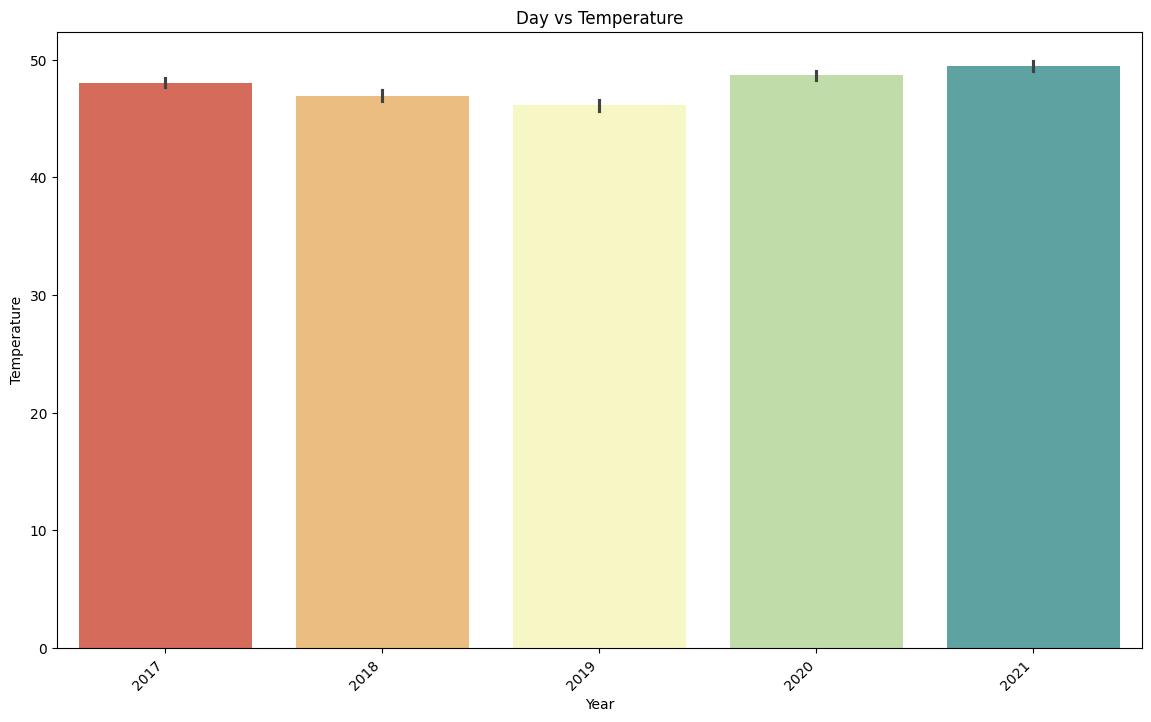

In [20]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Year', y='temperature_2m', data=df1, palette='Spectral')
plt.title('Day vs Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.xticks(rotation=45, ha='right')
plt.show()

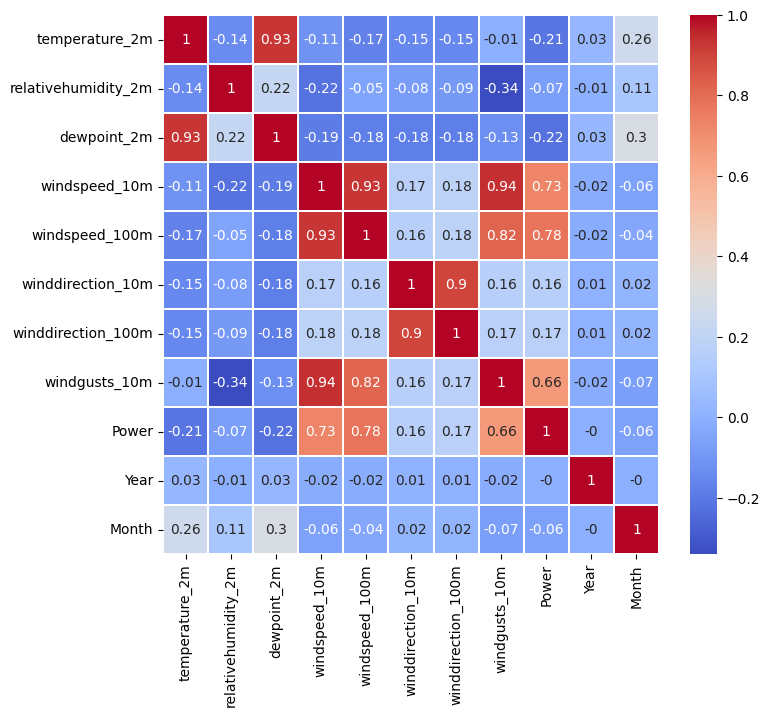

In [21]:
fig, axes = plt.subplots(figsize=(8,7))
corrdata=sns.heatmap(round(df1.iloc[:,1:12].corr(),2), cmap='coolwarm', annot=True,linewidths=0.1)
plt.show()

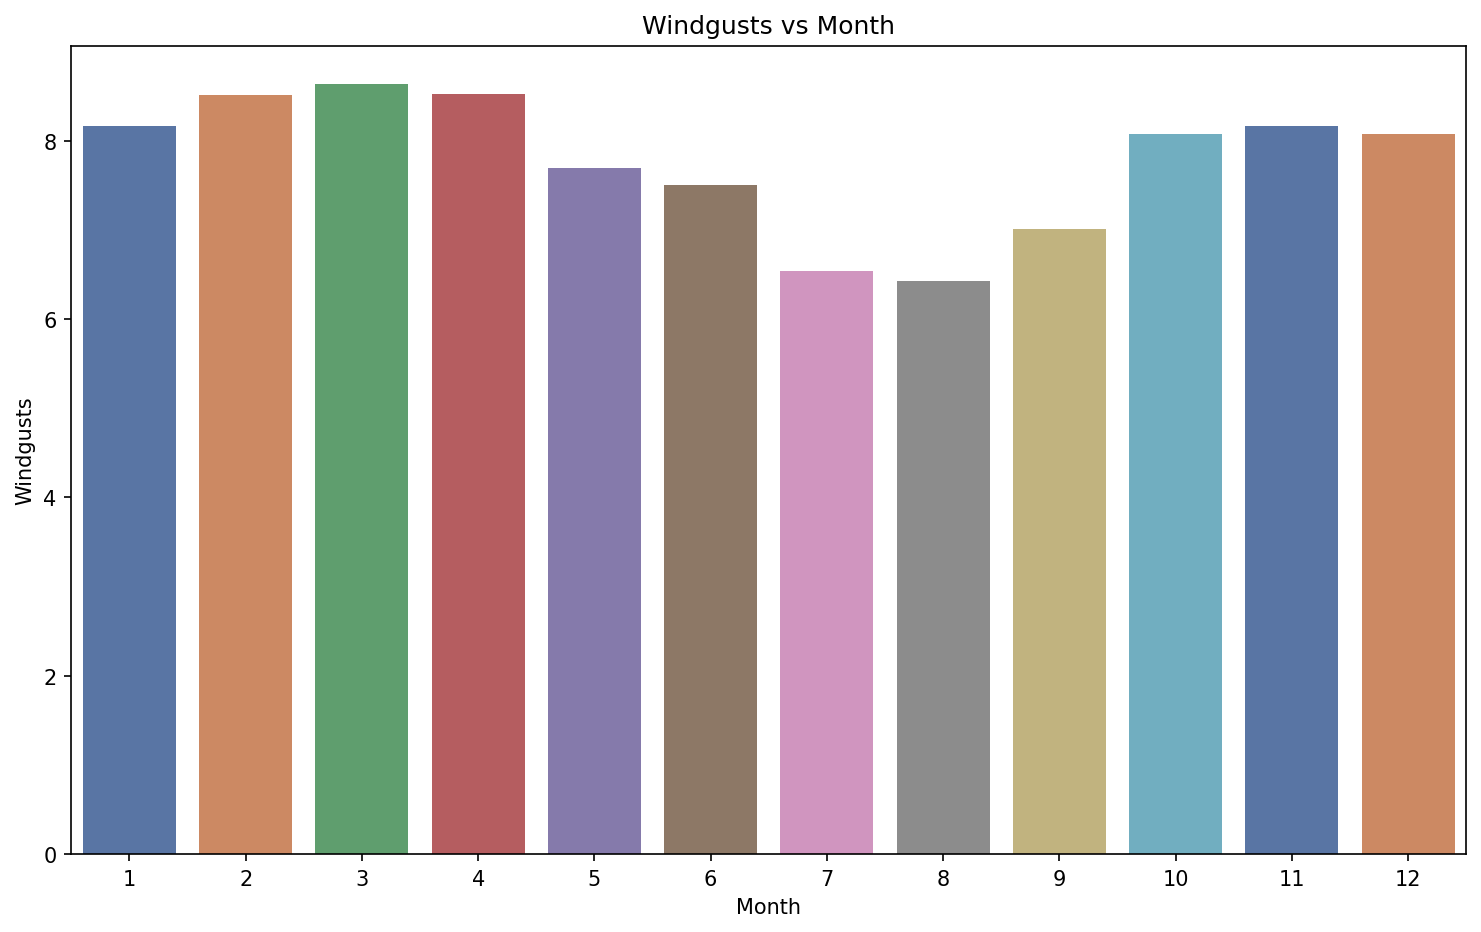

In [22]:
day_per_temperature = df1.groupby("Month")["windgusts_10m"].mean().sort_values(ascending=False)

plt.figure(figsize = (12, 7), dpi = 150)
sns.barplot(x = day_per_temperature.index, y = day_per_temperature.values,palette='deep')
plt.xlabel("Month")
#plt.xticks(['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.ylabel("Windgusts")
plt.title("Windgusts vs Month");

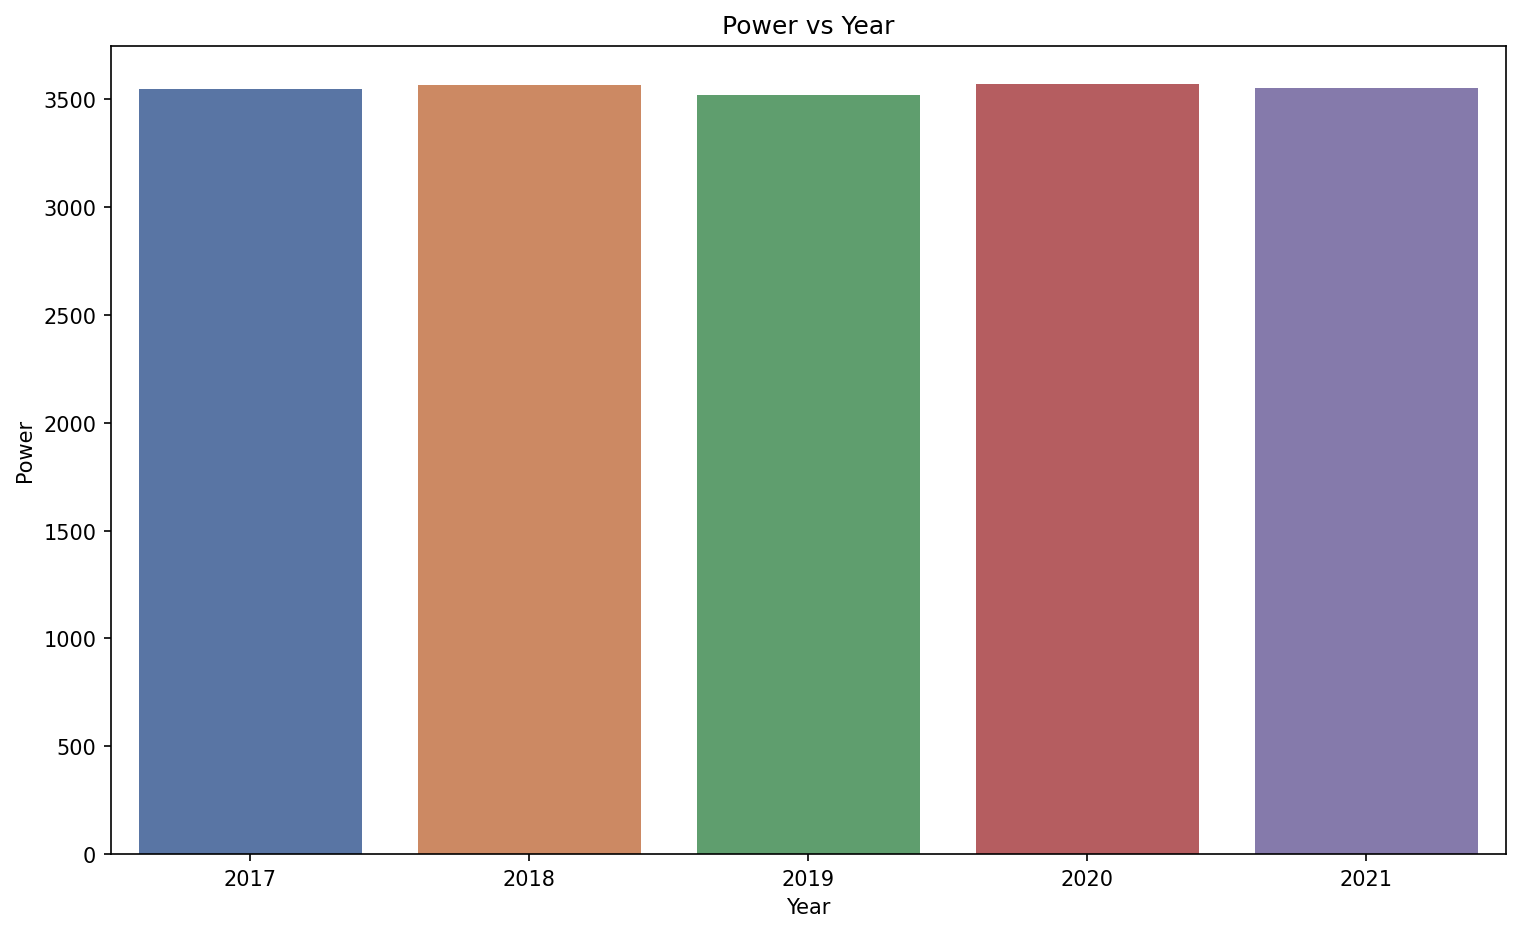

In [23]:
day_per_temperature = df1.groupby("Year")["Power"].sum().sort_values(ascending=False)

plt.figure(figsize = (12, 7), dpi = 150)
sns.barplot(x = day_per_temperature.index, y = day_per_temperature.values,palette='deep')
plt.xlabel("Year")
#plt.xticks(['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.ylabel("Power")
plt.title("Power vs Year");

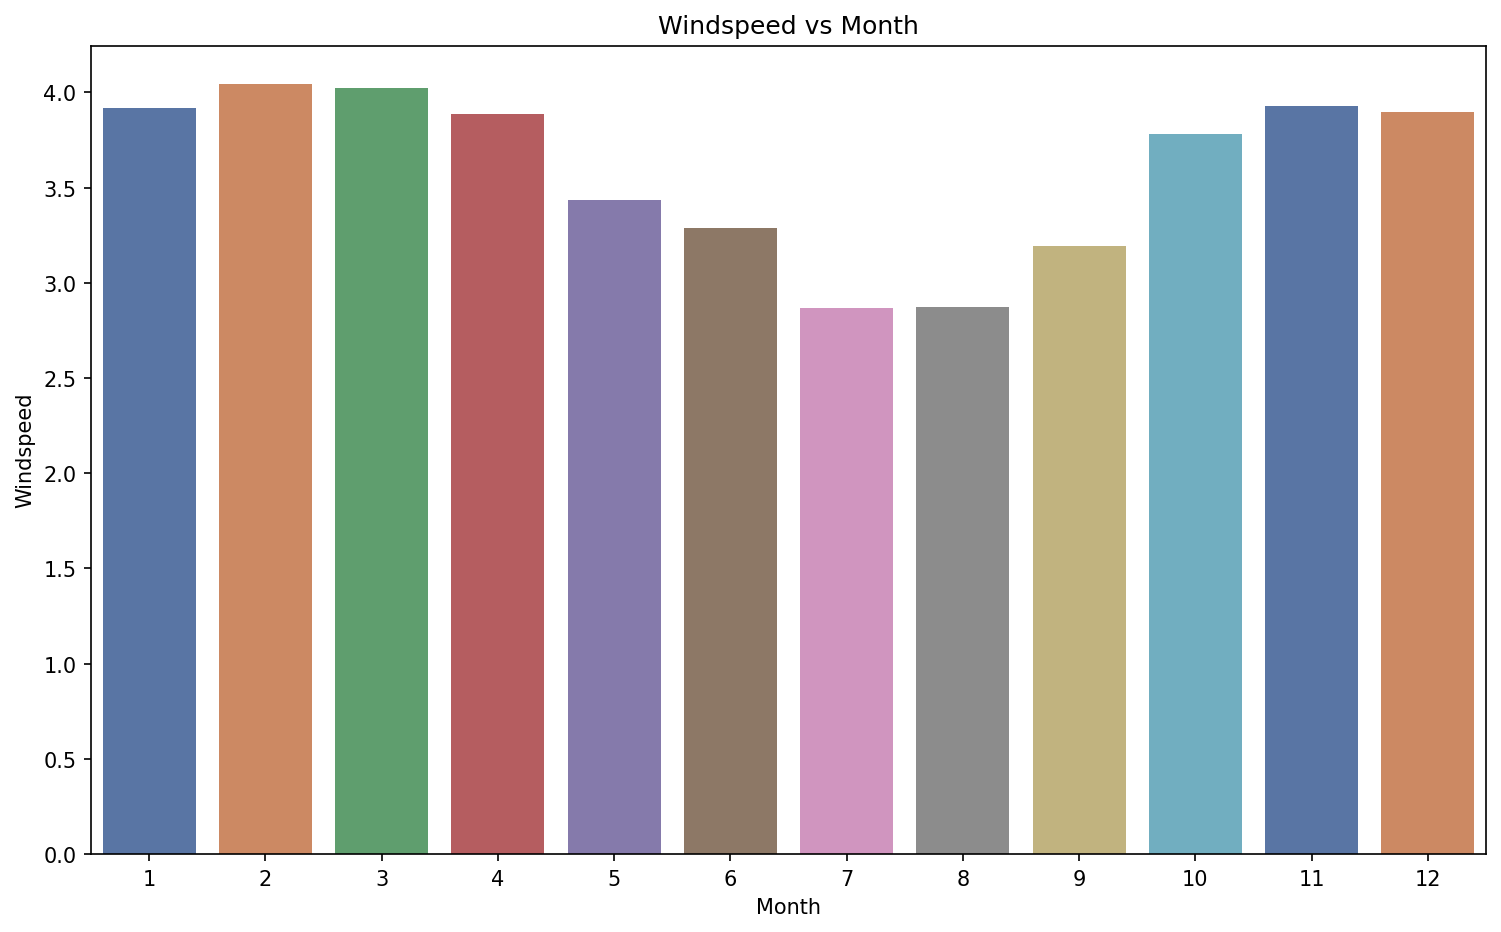

In [24]:
day_per_temperature = df1.groupby("Month")["windspeed_10m"].mean().sort_values(ascending=False)

plt.figure(figsize = (12, 7), dpi = 150)
sns.barplot(x = day_per_temperature.index, y = day_per_temperature.values,palette='deep')
plt.xlabel("Month")
#plt.xticks(['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.ylabel("Windspeed")
plt.title("Windspeed vs Month");

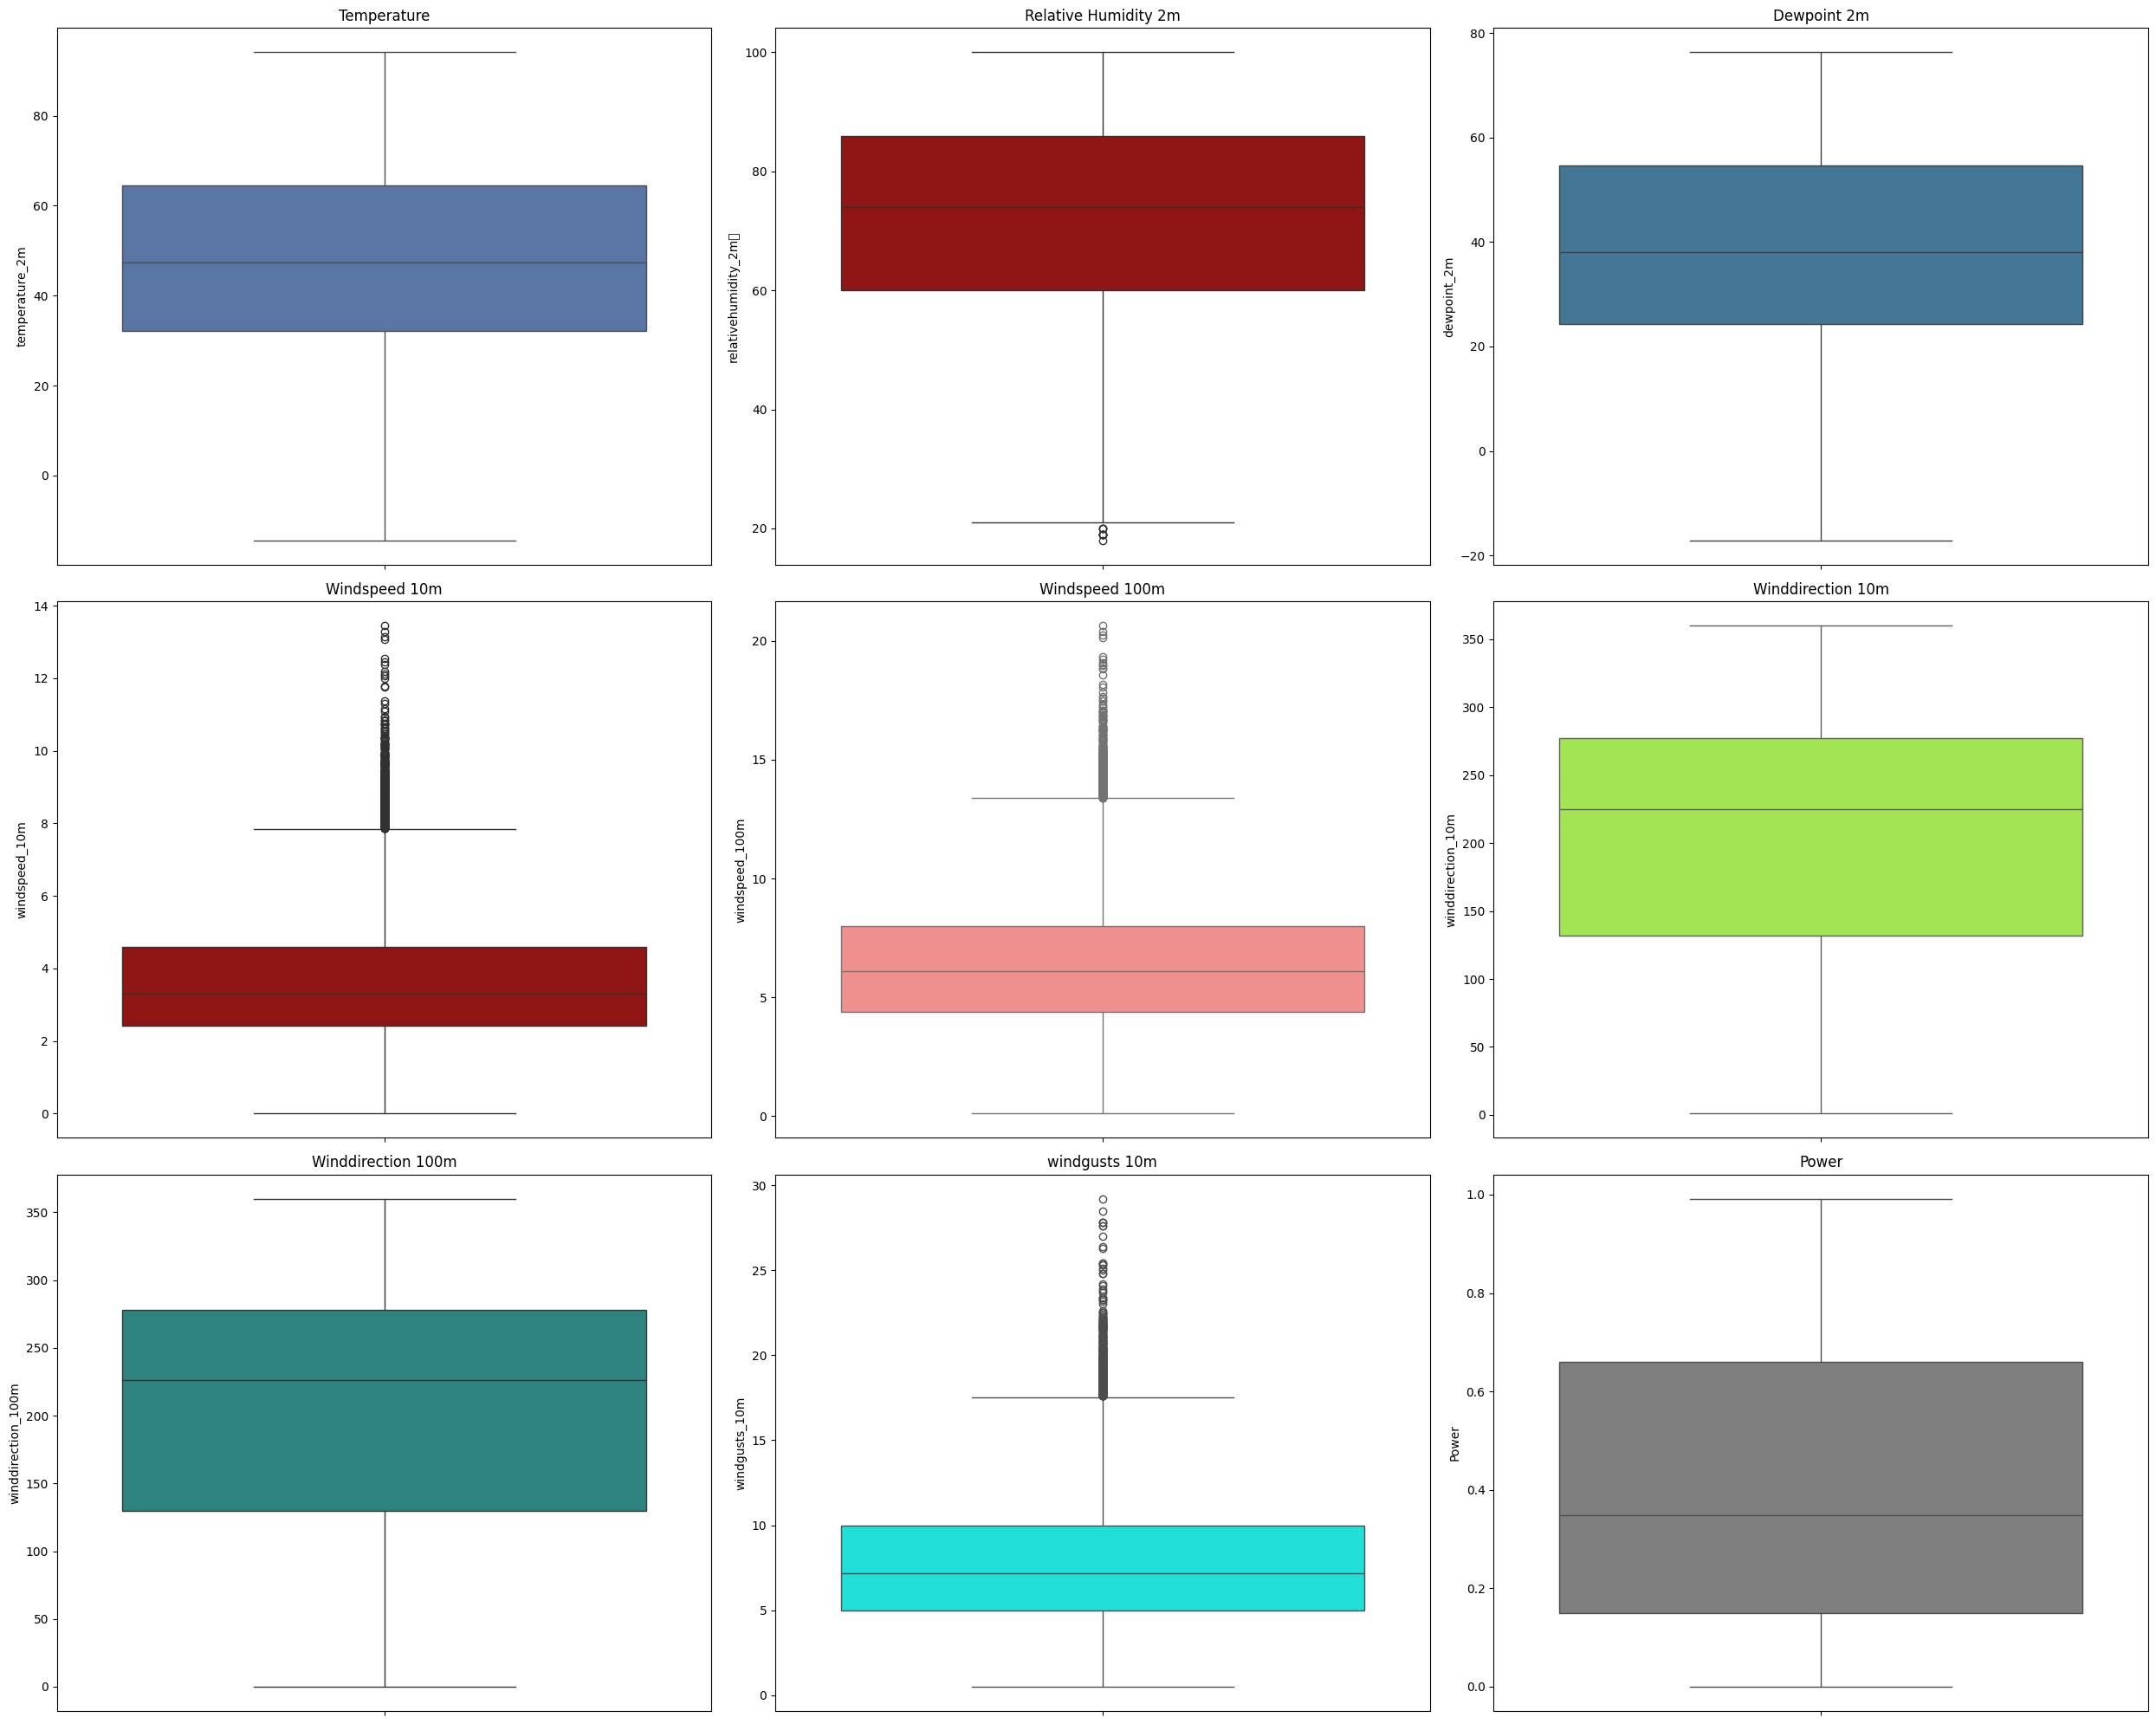

In [25]:
fig, axes = plt.subplots(3,3, figsize=(25,20))
sns.set_palette(palette="tab10")
sns.boxplot(data=df1, y= "temperature_2m",palette = 'deep',ax=axes[0,0]).set(xlabel='',ylabel='temperature_2m', title='Temperature')
sns.boxplot(data=df1, y= "relativehumidity_2m",palette = 'flag',ax=axes[0,1]).set(xlabel='',ylabel='relativehumidity_2m	', title='Relative Humidity 2m')
sns.boxplot(data=df1, y= "dewpoint_2m",palette = 'mako',ax=axes[0,2]).set(xlabel='',ylabel='dewpoint_2m', title='Dewpoint 2m')
sns.boxplot(data=df1, y= "windspeed_10m",palette = 'flag',ax=axes[1,0]).set(xlabel='',ylabel='windspeed_10m', title='Windspeed 10m')
sns.boxplot(data=df1, y= "windspeed_100m",palette = 'spring',ax=axes[1,1]).set(xlabel='',ylabel='windspeed_100m', title='Windspeed 100m')
sns.boxplot(data=df1, y= "winddirection_10m",palette = 'turbo',ax=axes[1,2]).set(xlabel='',ylabel='winddirection_10m', title='Winddirection 10m')
sns.boxplot(data=df1, y= "winddirection_100m",palette = 'viridis',ax=axes[2,0]).set(xlabel='',ylabel='winddirection_100m', title='Winddirection 100m')
sns.boxplot(data=df1, y= "windgusts_10m",palette = 'hsv',ax=axes[2,1]).set(xlabel='',ylabel='windgusts_10m', title='windgusts 10m')
sns.boxplot(data=df1, y= "Power",palette = 'binary',ax=axes[2,2]).set(xlabel='',ylabel='Power', title='Power')
plt.tight_layout()
plt.show()

In [26]:
columns=['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m',
       'windspeed_10m', 'windspeed_100m', 'winddirection_10m',
       'winddirection_100m', 'windgusts_10m', 'Power']
threshold = 2
for i in columns:
    mean = np.mean(df1[i])
    std = np.std(df1[i])
    z_scores = np.abs((df1[i] - mean) / std)
    outliers = z_scores > threshold
    print("Removed outliers:")
    #print(df1[outliers].relativehumidity_2m)
    df1 = df1[~outliers]

Removed outliers:
Removed outliers:
Removed outliers:
Removed outliers:
Removed outliers:
Removed outliers:
Removed outliers:
Removed outliers:
Removed outliers:


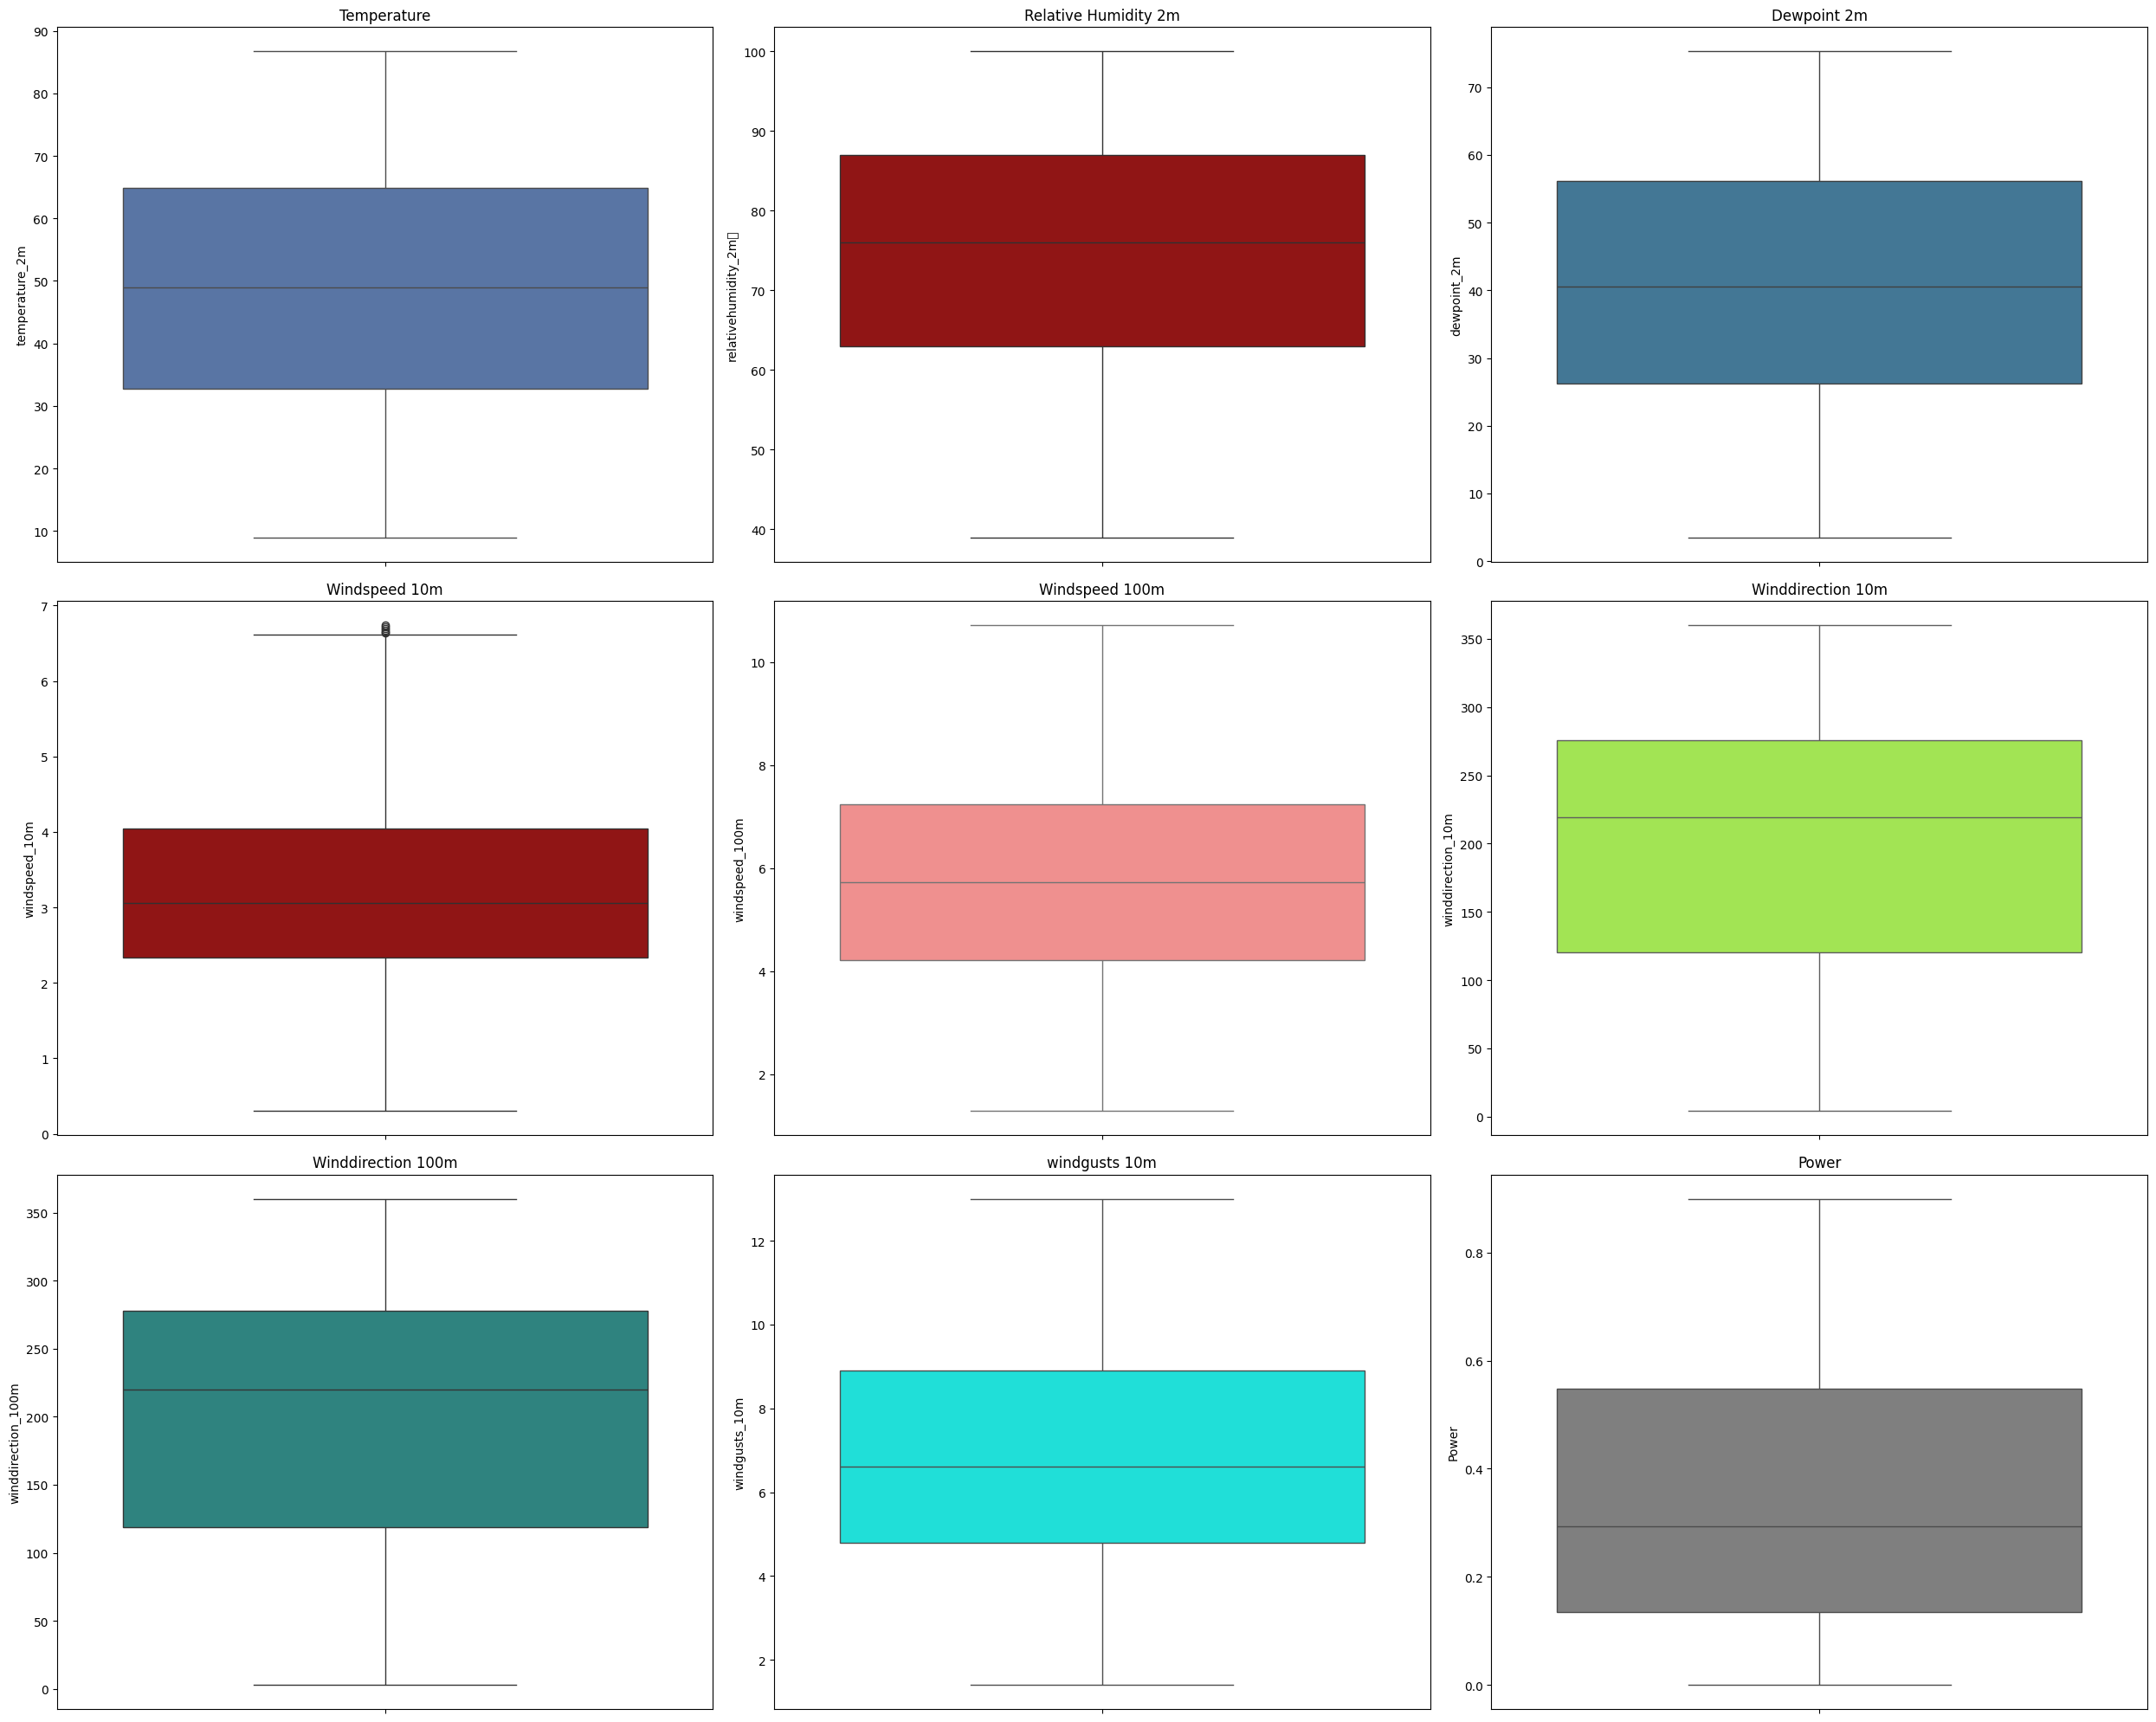

In [27]:
fig, axes = plt.subplots(3,3, figsize=(25,20))
sns.set_palette(palette="tab10")
sns.boxplot(data=df1, y= "temperature_2m",palette = 'deep',ax=axes[0,0]).set(xlabel='',ylabel='temperature_2m', title='Temperature')
sns.boxplot(data=df1, y= "relativehumidity_2m",palette = 'flag',ax=axes[0,1]).set(xlabel='',ylabel='relativehumidity_2m	', title='Relative Humidity 2m')
sns.boxplot(data=df1, y= "dewpoint_2m",palette = 'mako',ax=axes[0,2]).set(xlabel='',ylabel='dewpoint_2m', title='Dewpoint 2m')
sns.boxplot(data=df1, y= "windspeed_10m",palette = 'flag',ax=axes[1,0]).set(xlabel='',ylabel='windspeed_10m', title='Windspeed 10m')
sns.boxplot(data=df1, y= "windspeed_100m",palette = 'spring',ax=axes[1,1]).set(xlabel='',ylabel='windspeed_100m', title='Windspeed 100m')
sns.boxplot(data=df1, y= "winddirection_10m",palette = 'turbo',ax=axes[1,2]).set(xlabel='',ylabel='winddirection_10m', title='Winddirection 10m')
sns.boxplot(data=df1, y= "winddirection_100m",palette = 'viridis',ax=axes[2,0]).set(xlabel='',ylabel='winddirection_100m', title='Winddirection 100m')
sns.boxplot(data=df1, y= "windgusts_10m",palette = 'hsv',ax=axes[2,1]).set(xlabel='',ylabel='windgusts_10m', title='windgusts 10m')
sns.boxplot(data=df1, y= "Power",palette = 'binary',ax=axes[2,2]).set(xlabel='',ylabel='Power', title='Power')
plt.tight_layout()
plt.show()

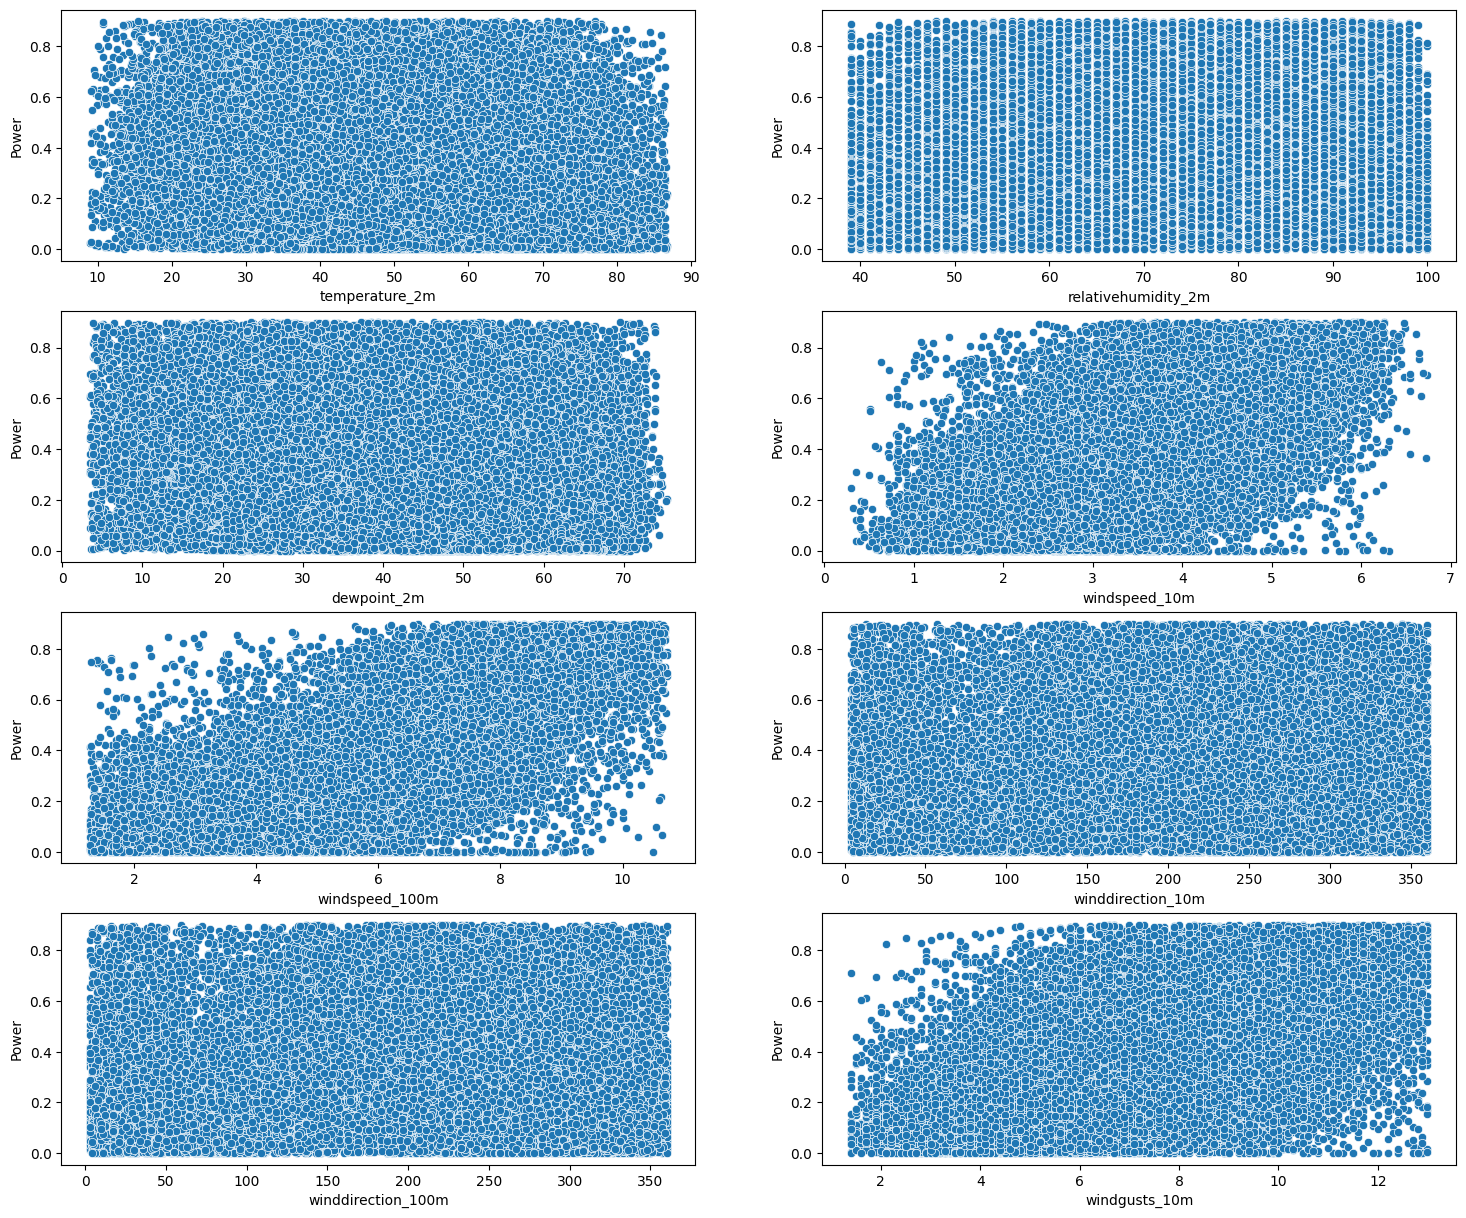

In [28]:
fig, axes = plt.subplots(4,2, figsize=(18,15))
sns.scatterplot(data=df1, y= "Power",x="temperature_2m",palette = 'viridis',ax=axes[0,0]).set(xlabel='temperature_2m',ylabel='Power')
sns.scatterplot(data=df1, y= "Power", x= "relativehumidity_2m",palette = 'deep',ax=axes[0,1]).set(xlabel='relativehumidity_2m',ylabel='Power')
sns.scatterplot(data=df1, y= "Power",x= "dewpoint_2m",palette = 'viridis',ax=axes[1,0]).set(xlabel='dewpoint_2m',ylabel='Power')
sns.scatterplot(data=df1, y= "Power", x= "windspeed_10m",palette = 'deep',ax=axes[1,1]).set(xlabel='windspeed_10m',ylabel='Power')
sns.scatterplot(data=df1, y= "Power", x= "windspeed_100m",palette = 'viridis',ax=axes[2,0]).set(xlabel='windspeed_100m',ylabel='Power')
sns.scatterplot(data=df1, y= "Power", x= "winddirection_10m",palette = 'deep',ax=axes[2,1]).set(xlabel='winddirection_10m',ylabel='Power')
sns.scatterplot(data=df1, y= "Power", x= "winddirection_100m",palette = 'viridis',ax=axes[3,0]).set(xlabel='winddirection_100m',ylabel='Power')
sns.scatterplot(data=df1, y= "Power", x= "windgusts_10m",palette = 'deep',ax=axes[3,1]).set(xlabel='windgusts_10m',ylabel='Power')
plt.show()

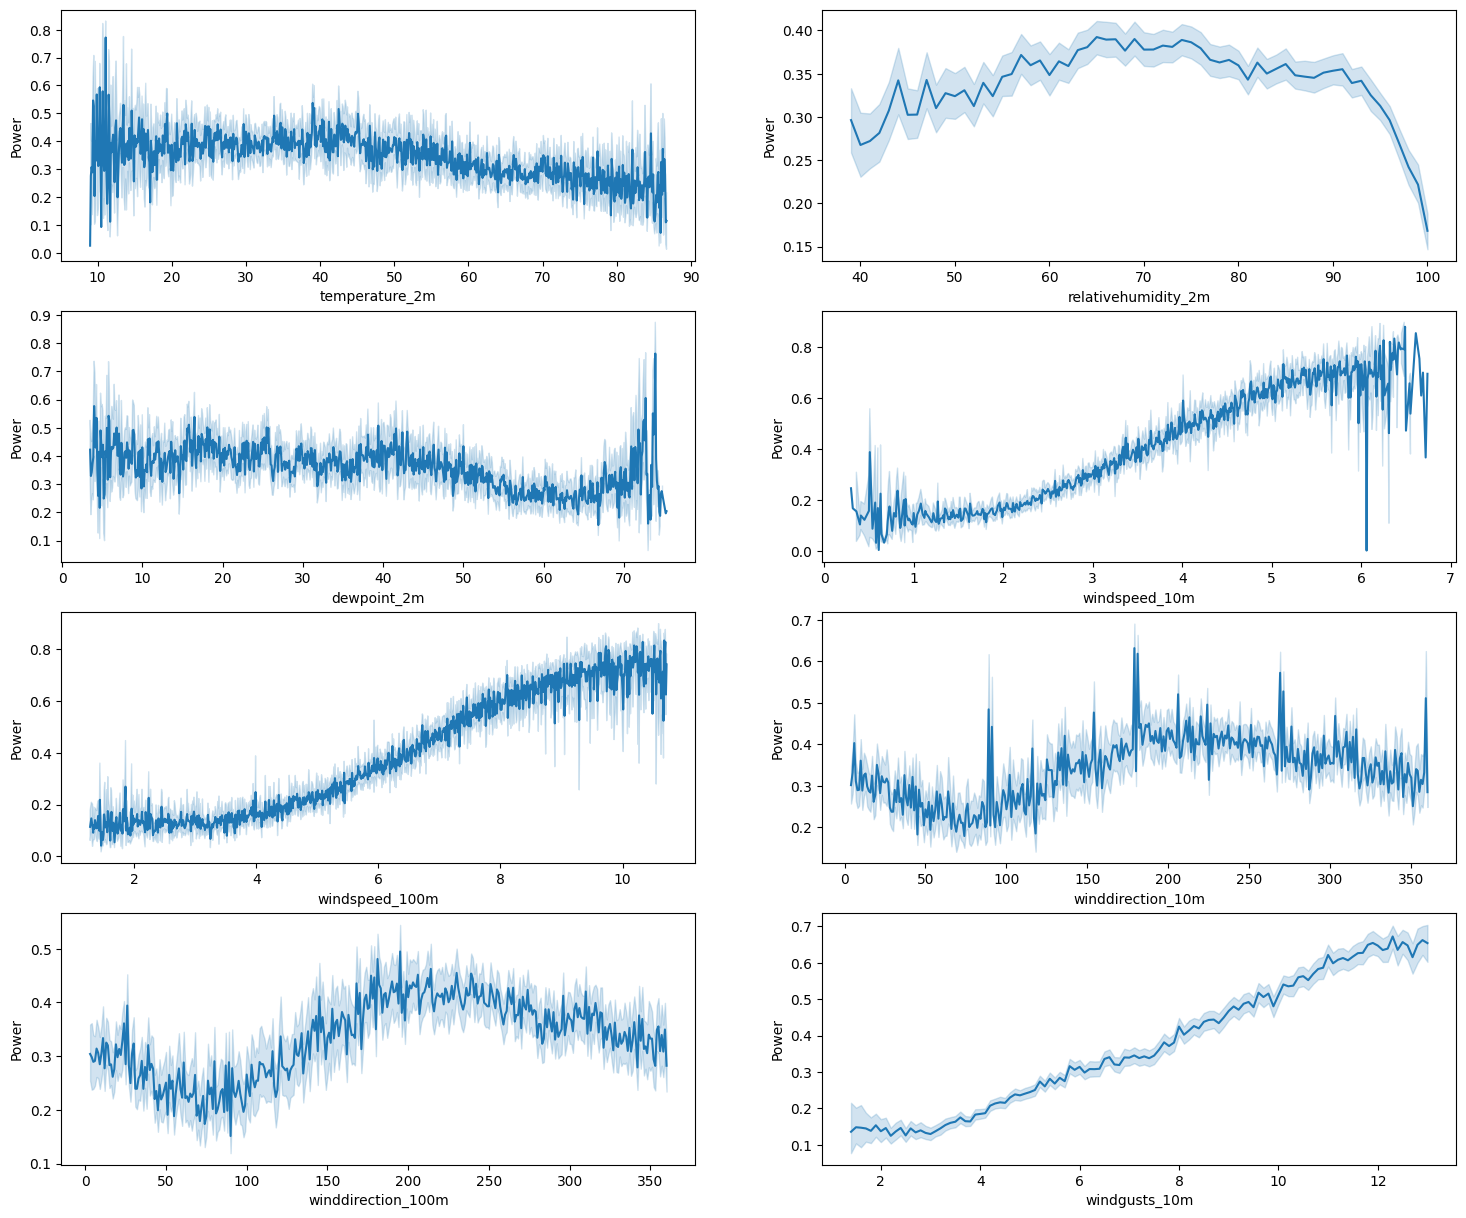

In [29]:
fig, axes = plt.subplots(4,2, figsize=(18,15))
sns.lineplot(data=df1, y= "Power",x="temperature_2m",palette = 'viridis',ax=axes[0,0]).set(xlabel='temperature_2m',ylabel='Power')
sns.lineplot(data=df1, y= "Power", x= "relativehumidity_2m",palette = 'deep',ax=axes[0,1]).set(xlabel='relativehumidity_2m',ylabel='Power')
sns.lineplot(data=df1, y= "Power",x= "dewpoint_2m",palette = 'viridis',ax=axes[1,0]).set(xlabel='dewpoint_2m',ylabel='Power')
sns.lineplot(data=df1, y= "Power", x= "windspeed_10m",palette = 'deep',ax=axes[1,1]).set(xlabel='windspeed_10m',ylabel='Power')
sns.lineplot(data=df1, y= "Power", x= "windspeed_100m",palette = 'viridis',ax=axes[2,0]).set(xlabel='windspeed_100m',ylabel='Power')
sns.lineplot(data=df1, y= "Power", x= "winddirection_10m",palette = 'deep',ax=axes[2,1]).set(xlabel='winddirection_10m',ylabel='Power')
sns.lineplot(data=df1, y= "Power", x= "winddirection_100m",palette = 'viridis',ax=axes[3,0]).set(xlabel='winddirection_100m',ylabel='Power')
sns.lineplot(data=df1, y= "Power", x= "windgusts_10m",palette = 'deep',ax=axes[3,1]).set(xlabel='windgusts_10m',ylabel='Power')
plt.show()

<Axes: xlabel='Time'>

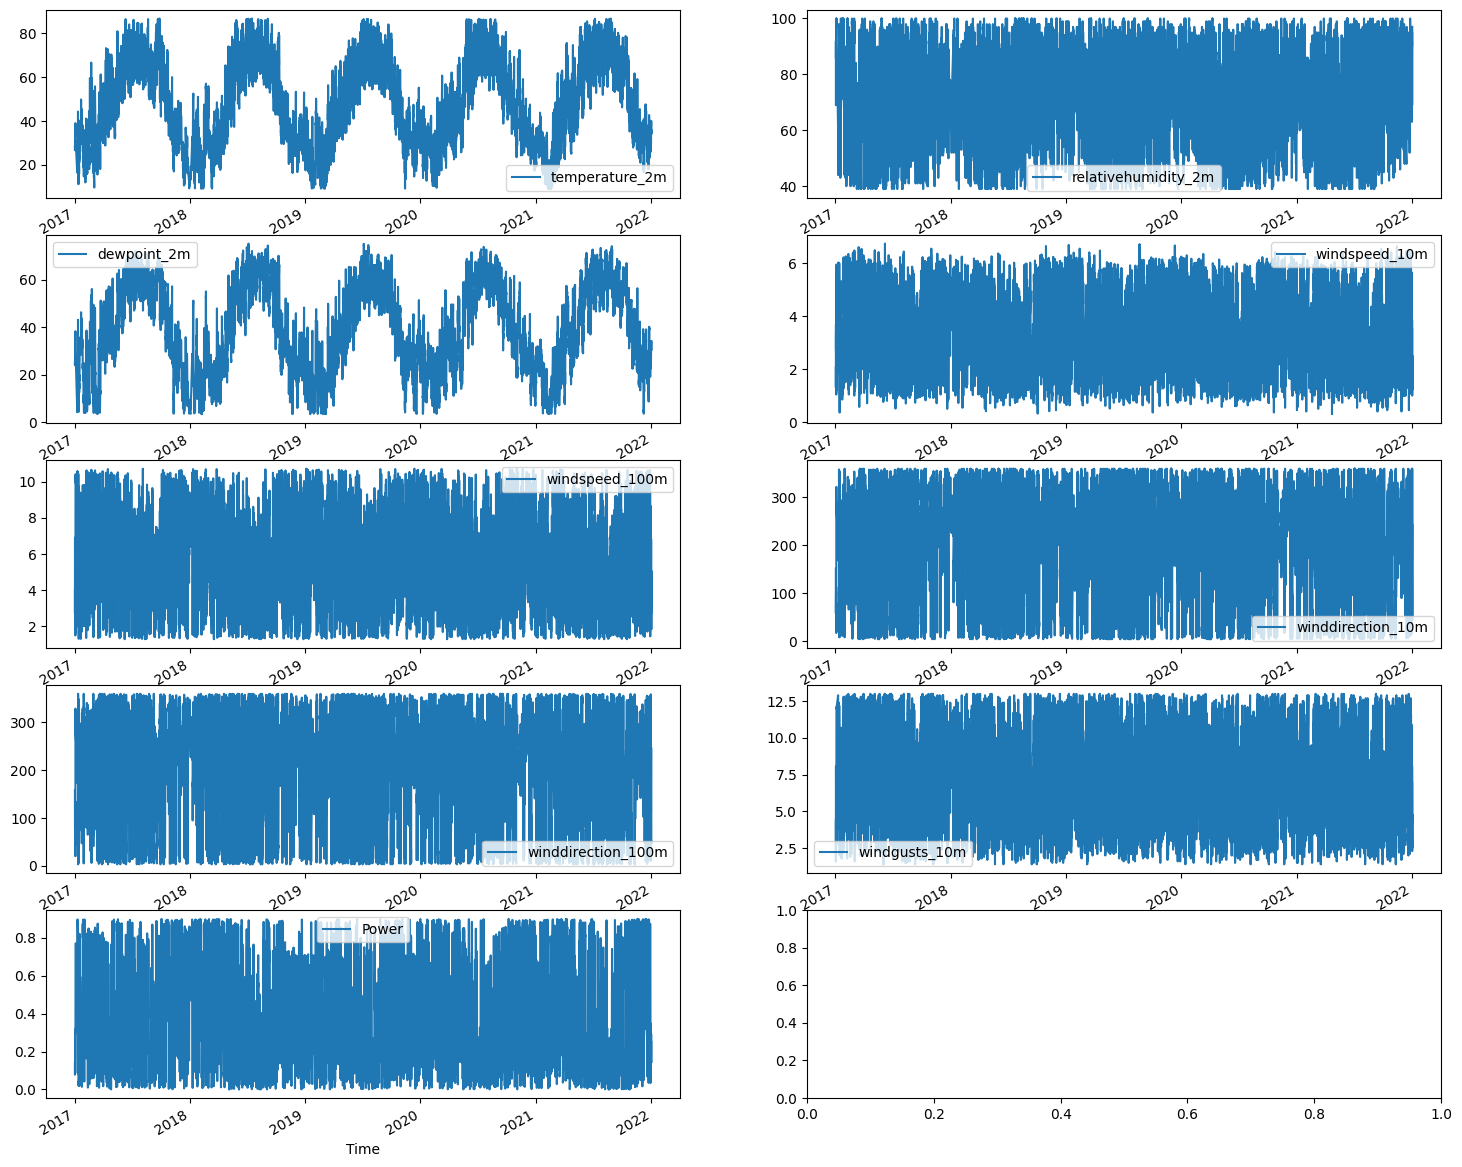

In [30]:
fig, axes = plt.subplots(5,2, figsize=(18,16))
df1.plot('Time','temperature_2m',ax=axes[0,0])
df1.plot('Time','relativehumidity_2m',ax=axes[0,1])
df1.plot('Time','dewpoint_2m',ax=axes[1,0])
df1.plot('Time','windspeed_10m',ax=axes[1,1])
df1.plot('Time','windspeed_100m',ax=axes[2,0])
df1.plot('Time','winddirection_10m',ax=axes[2,1])
df1.plot('Time','winddirection_100m',ax=axes[3,0])
df1.plot('Time','windgusts_10m',ax=axes[3,1])
df1.plot('Time','Power',ax=axes[4,0])

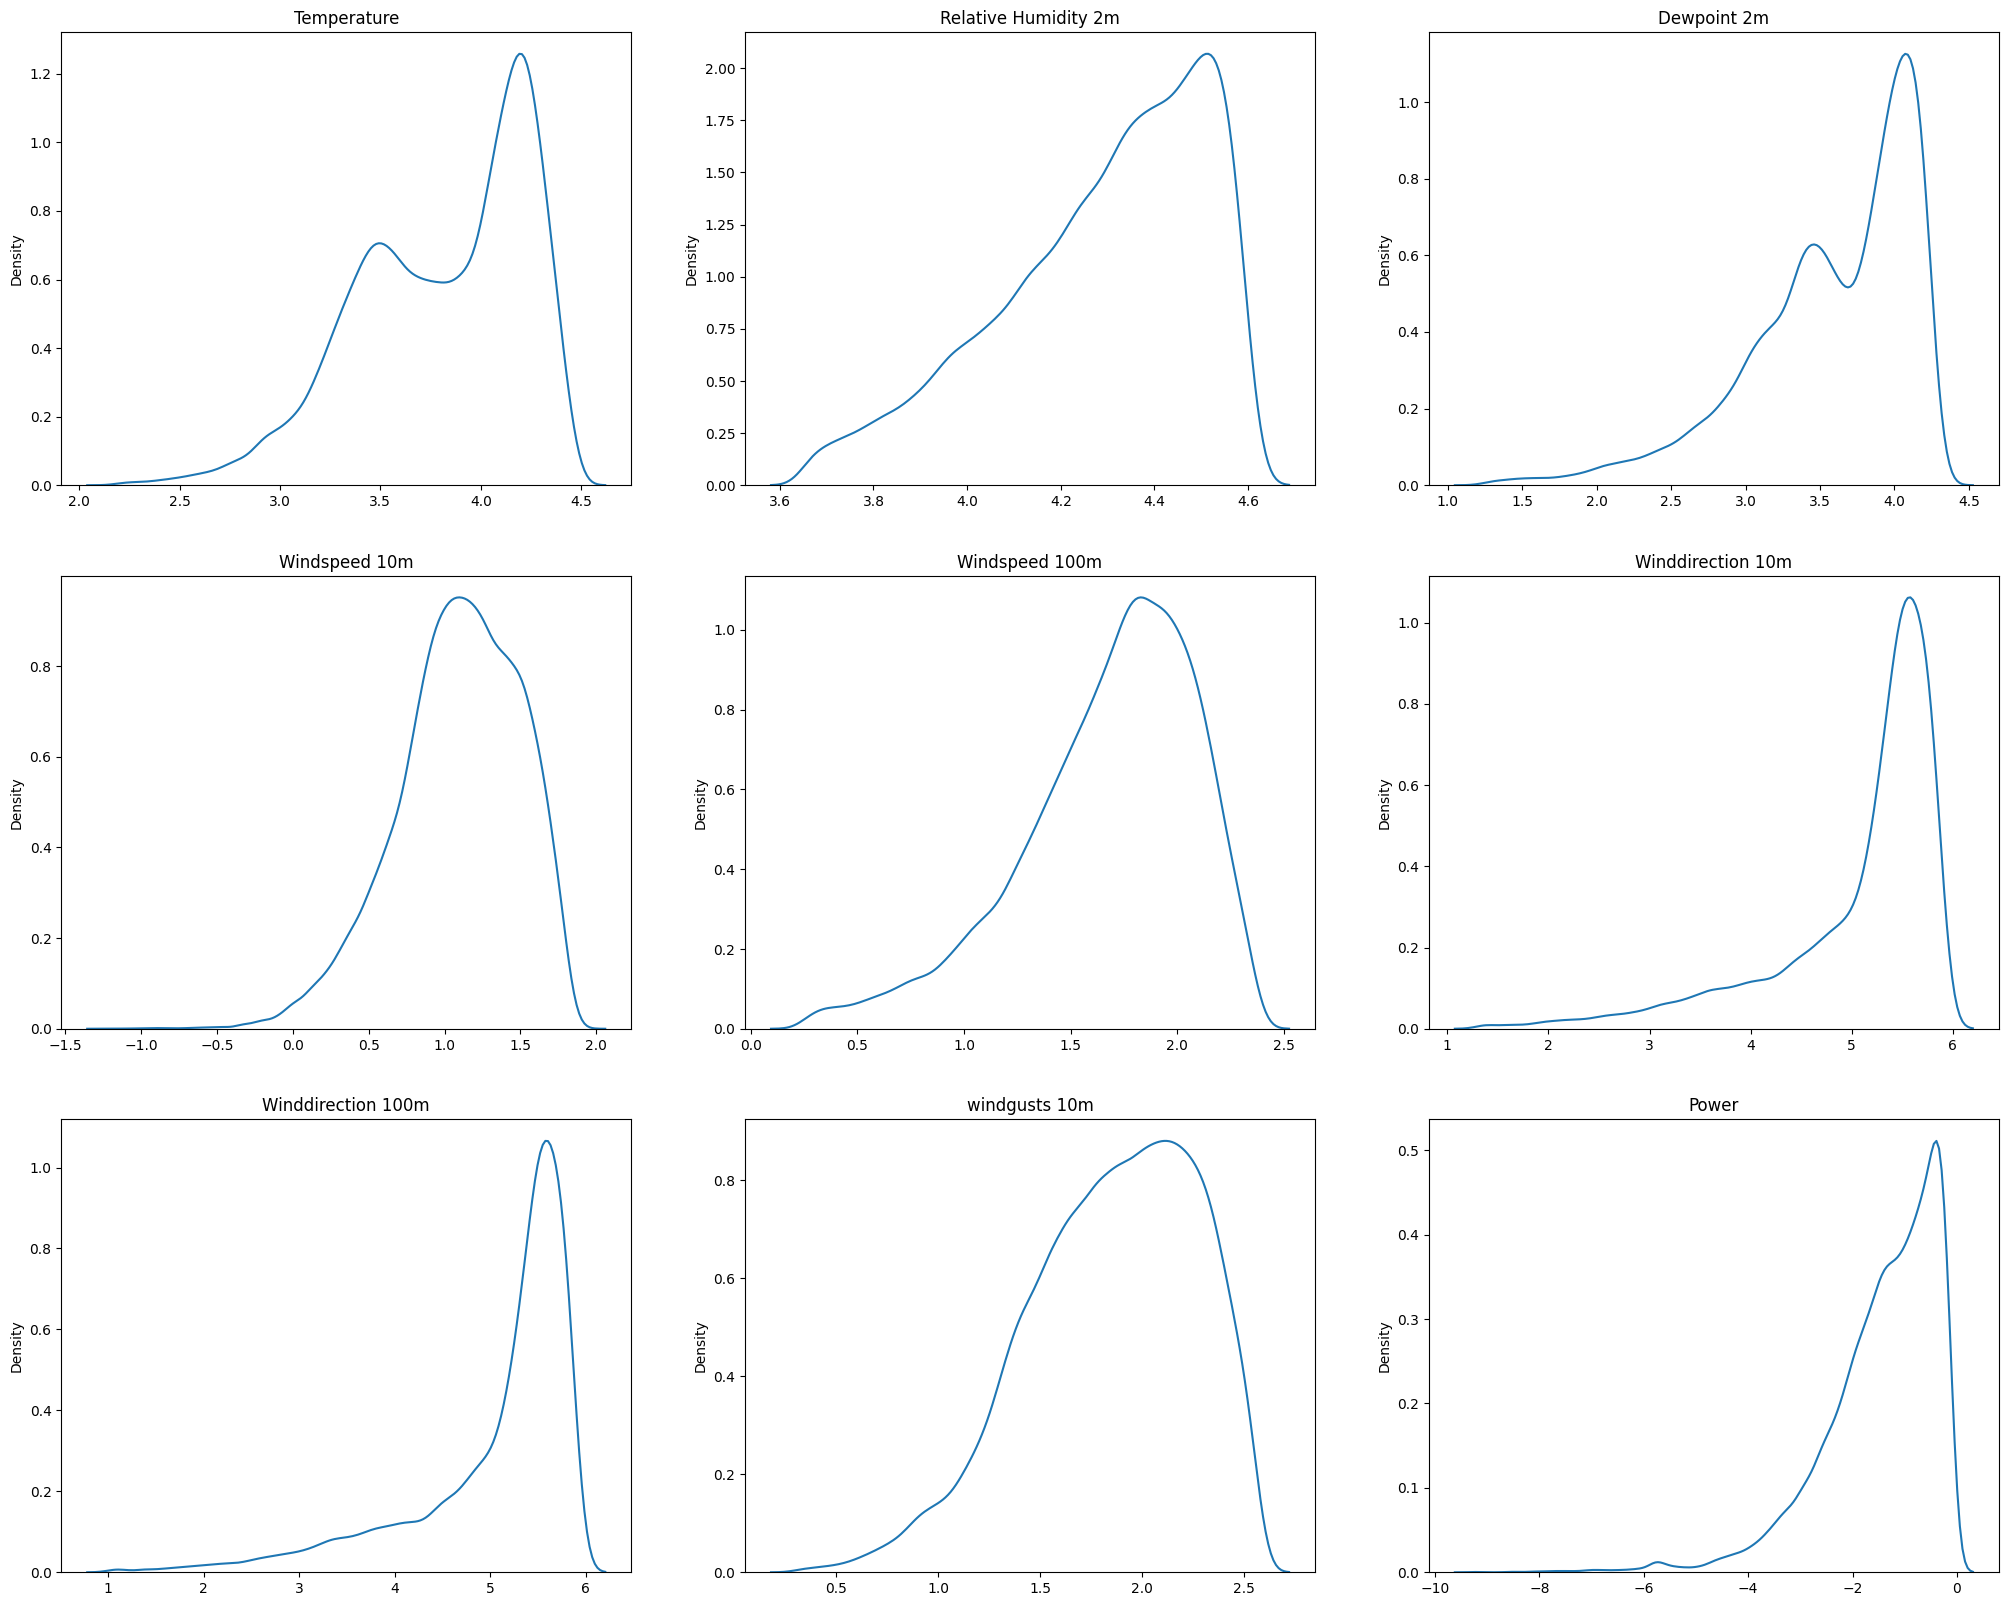

In [31]:
fig, axes = plt.subplots(3,3, figsize=(25,20))
sns.kdeplot(np.log(df1['temperature_2m']),ax=axes[0,0]).set(xlabel='', title='Temperature')
sns.kdeplot(np.log(df1['relativehumidity_2m']),ax=axes[0,1]).set(xlabel='', title='Relative Humidity 2m')
sns.kdeplot(np.log(df1['dewpoint_2m']),ax=axes[0,2]).set(xlabel='', title='Dewpoint 2m')
sns.kdeplot(np.log(df1['windspeed_10m']),ax=axes[1,0]).set(xlabel='', title='Windspeed 10m')
sns.kdeplot(np.log(df1['windspeed_100m']),ax=axes[1,1]).set(xlabel='', title='Windspeed 100m')
sns.kdeplot(np.log(df1['winddirection_10m']),ax=axes[1,2]).set(xlabel='', title='Winddirection 10m')
sns.kdeplot(np.log(df1['winddirection_100m']),ax=axes[2,0]).set(xlabel='', title='Winddirection 100m')
sns.kdeplot(np.log(df1['windgusts_10m']),ax=axes[2,1]).set(xlabel='', title='windgusts 10m')
sns.kdeplot(np.log(df1['Power']),ax=axes[2,2]).set(xlabel='', title='Power')
plt.show()

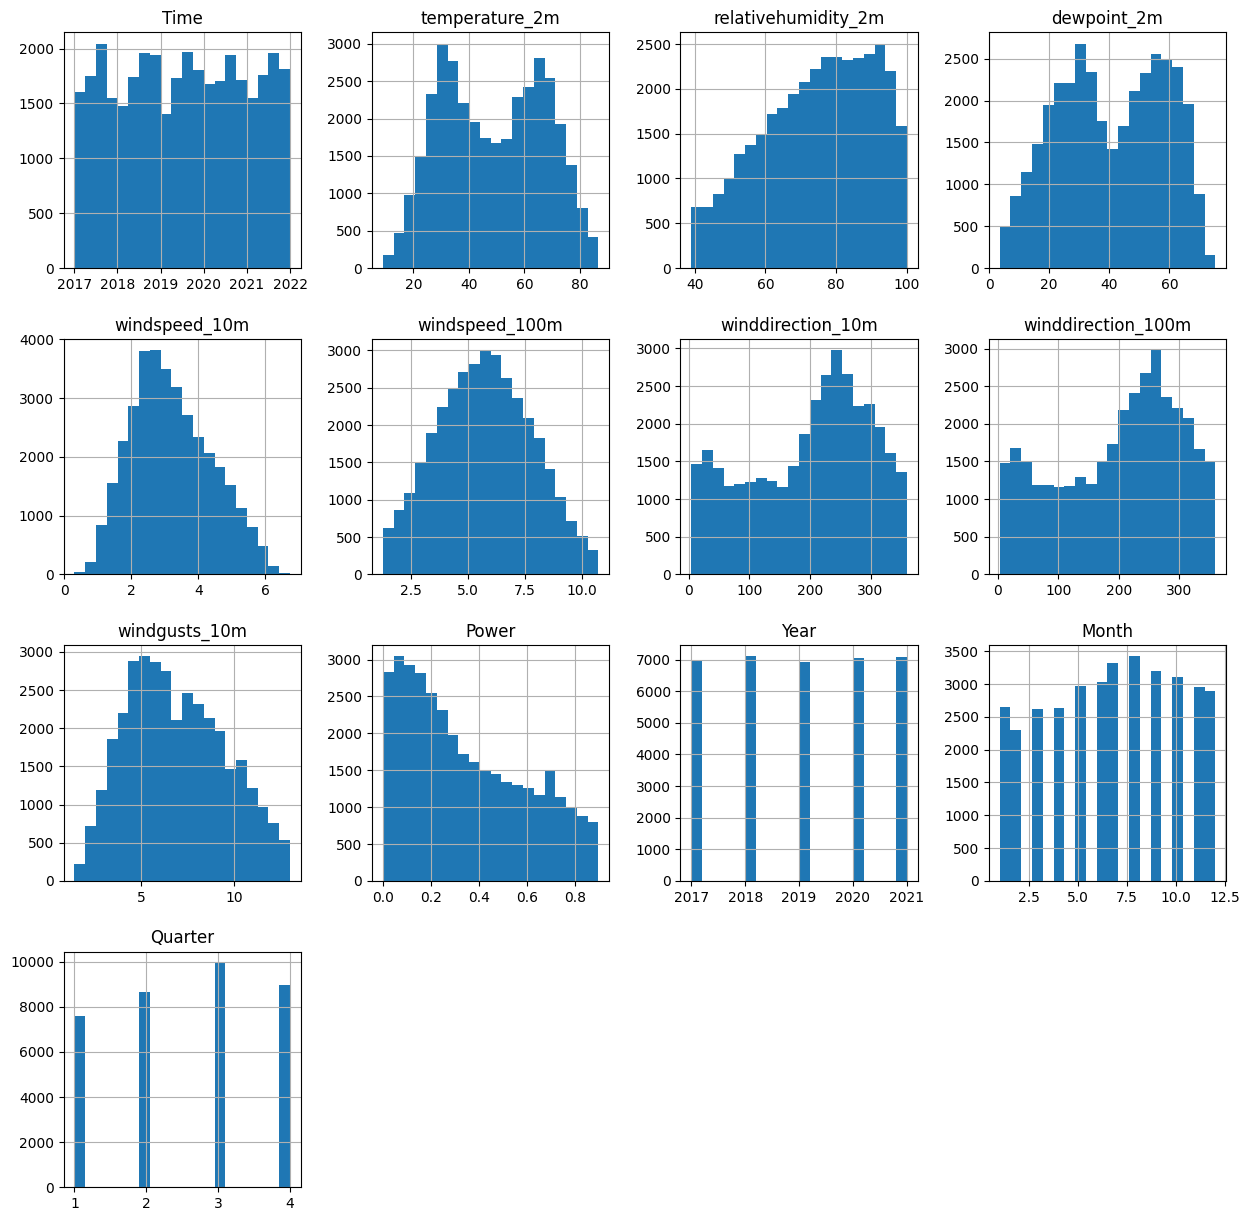

In [32]:
df1.hist(bins=20, figsize=(15, 15))
plt.show()

<Axes: xlabel='Year'>

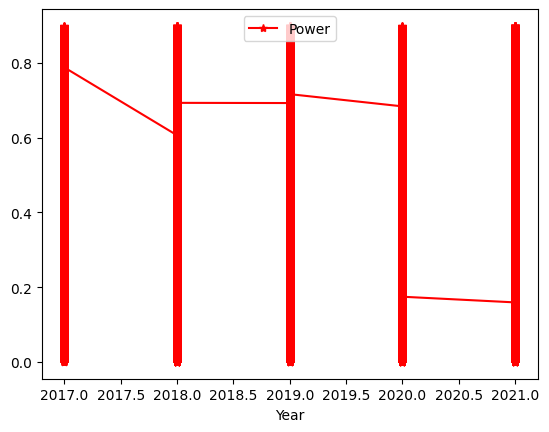

In [33]:
df1.plot('Year','Power',color='red',marker='*')

In [34]:
df2.describe()

temperature_2m  relativehumidity_2m   dewpoint_2m  windspeed_10m  \
count    43800.000000         43800.000000  43800.000000   43800.000000   
mean        42.725605            69.085091     32.215932       4.693236   
std         23.724354            17.317481     21.307625       2.238572   
min        -31.200000            16.000000    -36.200000       0.000000   
25%         26.100000            56.000000     18.600000       3.010000   
50%         42.700000            71.000000     32.000000       4.440000   
75%         63.000000            83.000000     50.600000       6.040000   
max         95.400000           100.000000     76.600000      18.270000   

       windspeed_100m  winddirection_10m  winddirection_100m  windgusts_10m  \
count    43800.000000       43800.000000        43800.000000   43800.000000   
mean         7.572439         208.512626          206.555594       8.557470   
std          3.381060         103.088845          104.882857       3.710385   
min          0.100000           1.000000            0.000000       0.500000   
25%          5.110000         135.000000          129.000000       5.800000   
50%          7.400000         224.000000          218.000000       8.200000   
75%          9.740000         300.000000          302.000000      10.800000   
max         24.590000         360.000000          360.000000      29.000000   

              Power  
count  43800.000000  
mean       0.249902  
std        0.209088  
min        0.000000  
25%        0.076200  
50%        0.194950  
75%        0.381800  
max        0.985900

In [35]:
df2.isnull().sum()

Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
dtype: int64

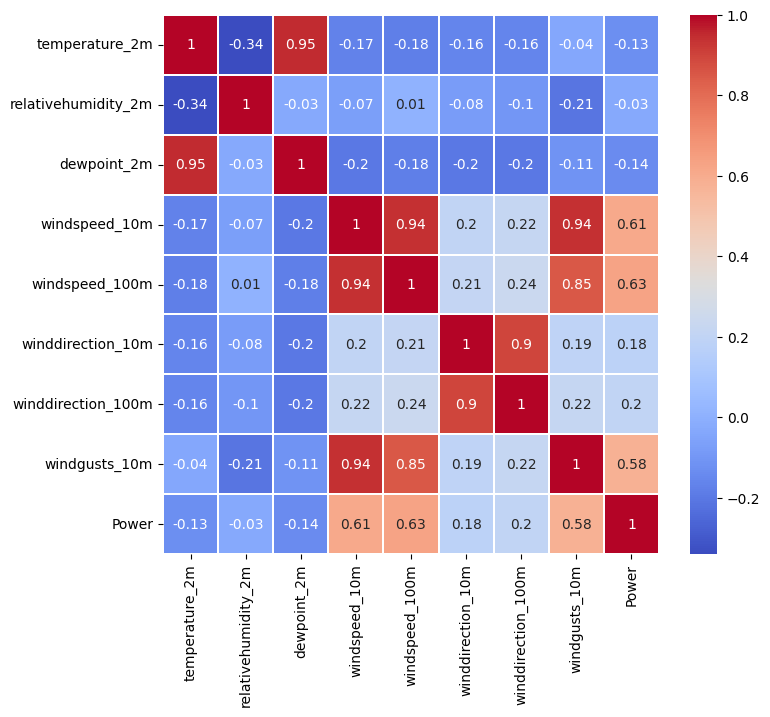

In [36]:
fig, axes = plt.subplots(figsize=(8,7))
corrdata=sns.heatmap(round(df2.iloc[:,1:12].corr(),2), cmap='coolwarm', annot=True,linewidths=0.1)
plt.show()

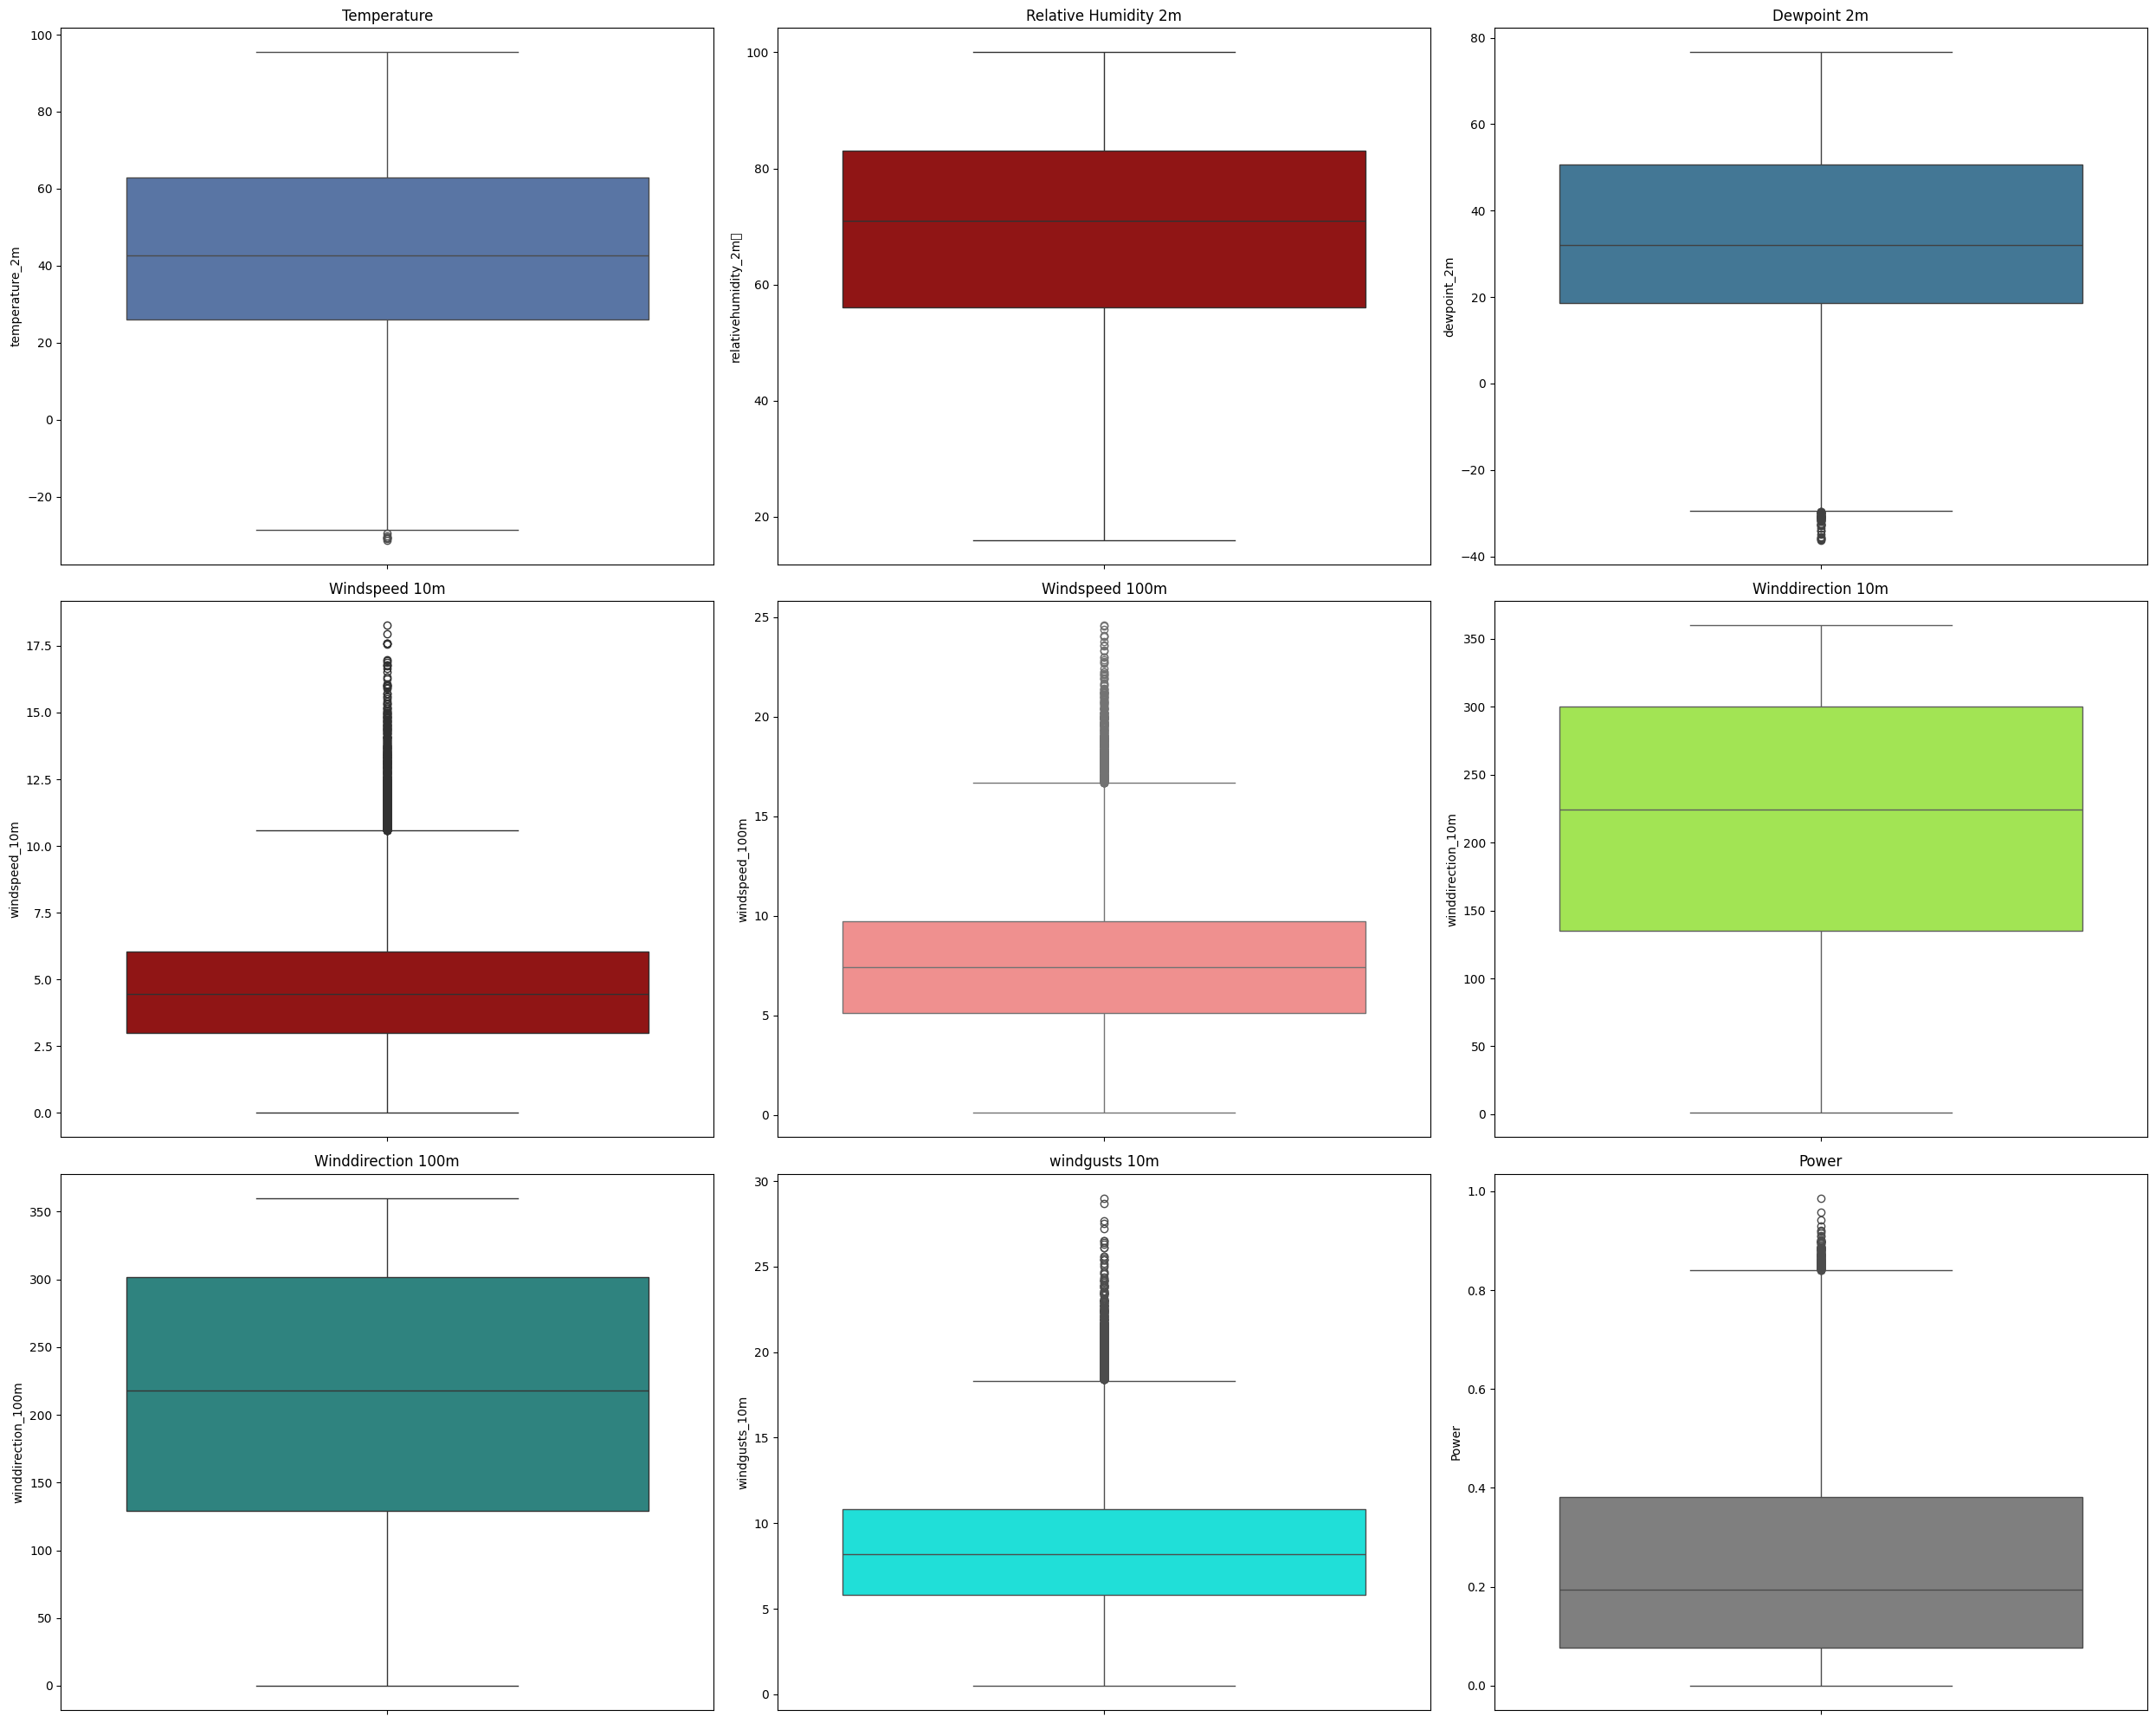

In [37]:
fig, axes = plt.subplots(3,3, figsize=(25,20))
sns.set_palette(palette="tab10")
sns.boxplot(data=df2, y= "temperature_2m",palette = 'deep',ax=axes[0,0]).set(xlabel='',ylabel='temperature_2m', title='Temperature')
sns.boxplot(data=df2, y= "relativehumidity_2m",palette = 'flag',ax=axes[0,1]).set(xlabel='',ylabel='relativehumidity_2m	', title='Relative Humidity 2m')
sns.boxplot(data=df2, y= "dewpoint_2m",palette = 'mako',ax=axes[0,2]).set(xlabel='',ylabel='dewpoint_2m', title='Dewpoint 2m')
sns.boxplot(data=df2, y= "windspeed_10m",palette = 'flag',ax=axes[1,0]).set(xlabel='',ylabel='windspeed_10m', title='Windspeed 10m')
sns.boxplot(data=df2, y= "windspeed_100m",palette = 'spring',ax=axes[1,1]).set(xlabel='',ylabel='windspeed_100m', title='Windspeed 100m')
sns.boxplot(data=df2, y= "winddirection_10m",palette = 'turbo',ax=axes[1,2]).set(xlabel='',ylabel='winddirection_10m', title='Winddirection 10m')
sns.boxplot(data=df2, y= "winddirection_100m",palette = 'viridis',ax=axes[2,0]).set(xlabel='',ylabel='winddirection_100m', title='Winddirection 100m')
sns.boxplot(data=df2, y= "windgusts_10m",palette = 'hsv',ax=axes[2,1]).set(xlabel='',ylabel='windgusts_10m', title='windgusts 10m')
sns.boxplot(data=df2, y= "Power",palette = 'binary',ax=axes[2,2]).set(xlabel='',ylabel='Power', title='Power')
plt.tight_layout()
plt.show()

In [38]:
columns=['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m',
       'windspeed_10m', 'windspeed_100m', 'winddirection_10m',
       'winddirection_100m', 'windgusts_10m', 'Power']
threshold = 2
for i in columns:
    mean = np.mean(df2[i])
    std = np.std(df2[i])
    z_scores = np.abs((df2[i] - mean) / std)
    outliers = z_scores > threshold
    print("Removed outliers:")
    #print(df1[outliers].relativehumidity_2m)
    df2 = df2[~outliers]

Removed outliers:
Removed outliers:
Removed outliers:
Removed outliers:
Removed outliers:
Removed outliers:
Removed outliers:
Removed outliers:
Removed outliers:


In [39]:
df2.columns

Index(['Time', 'temperature_2m', 'relativehumidity_2m', 'dewpoint_2m',
       'windspeed_10m', 'windspeed_100m', 'winddirection_10m',
       'winddirection_100m', 'windgusts_10m', 'Power'],
      dtype='object')

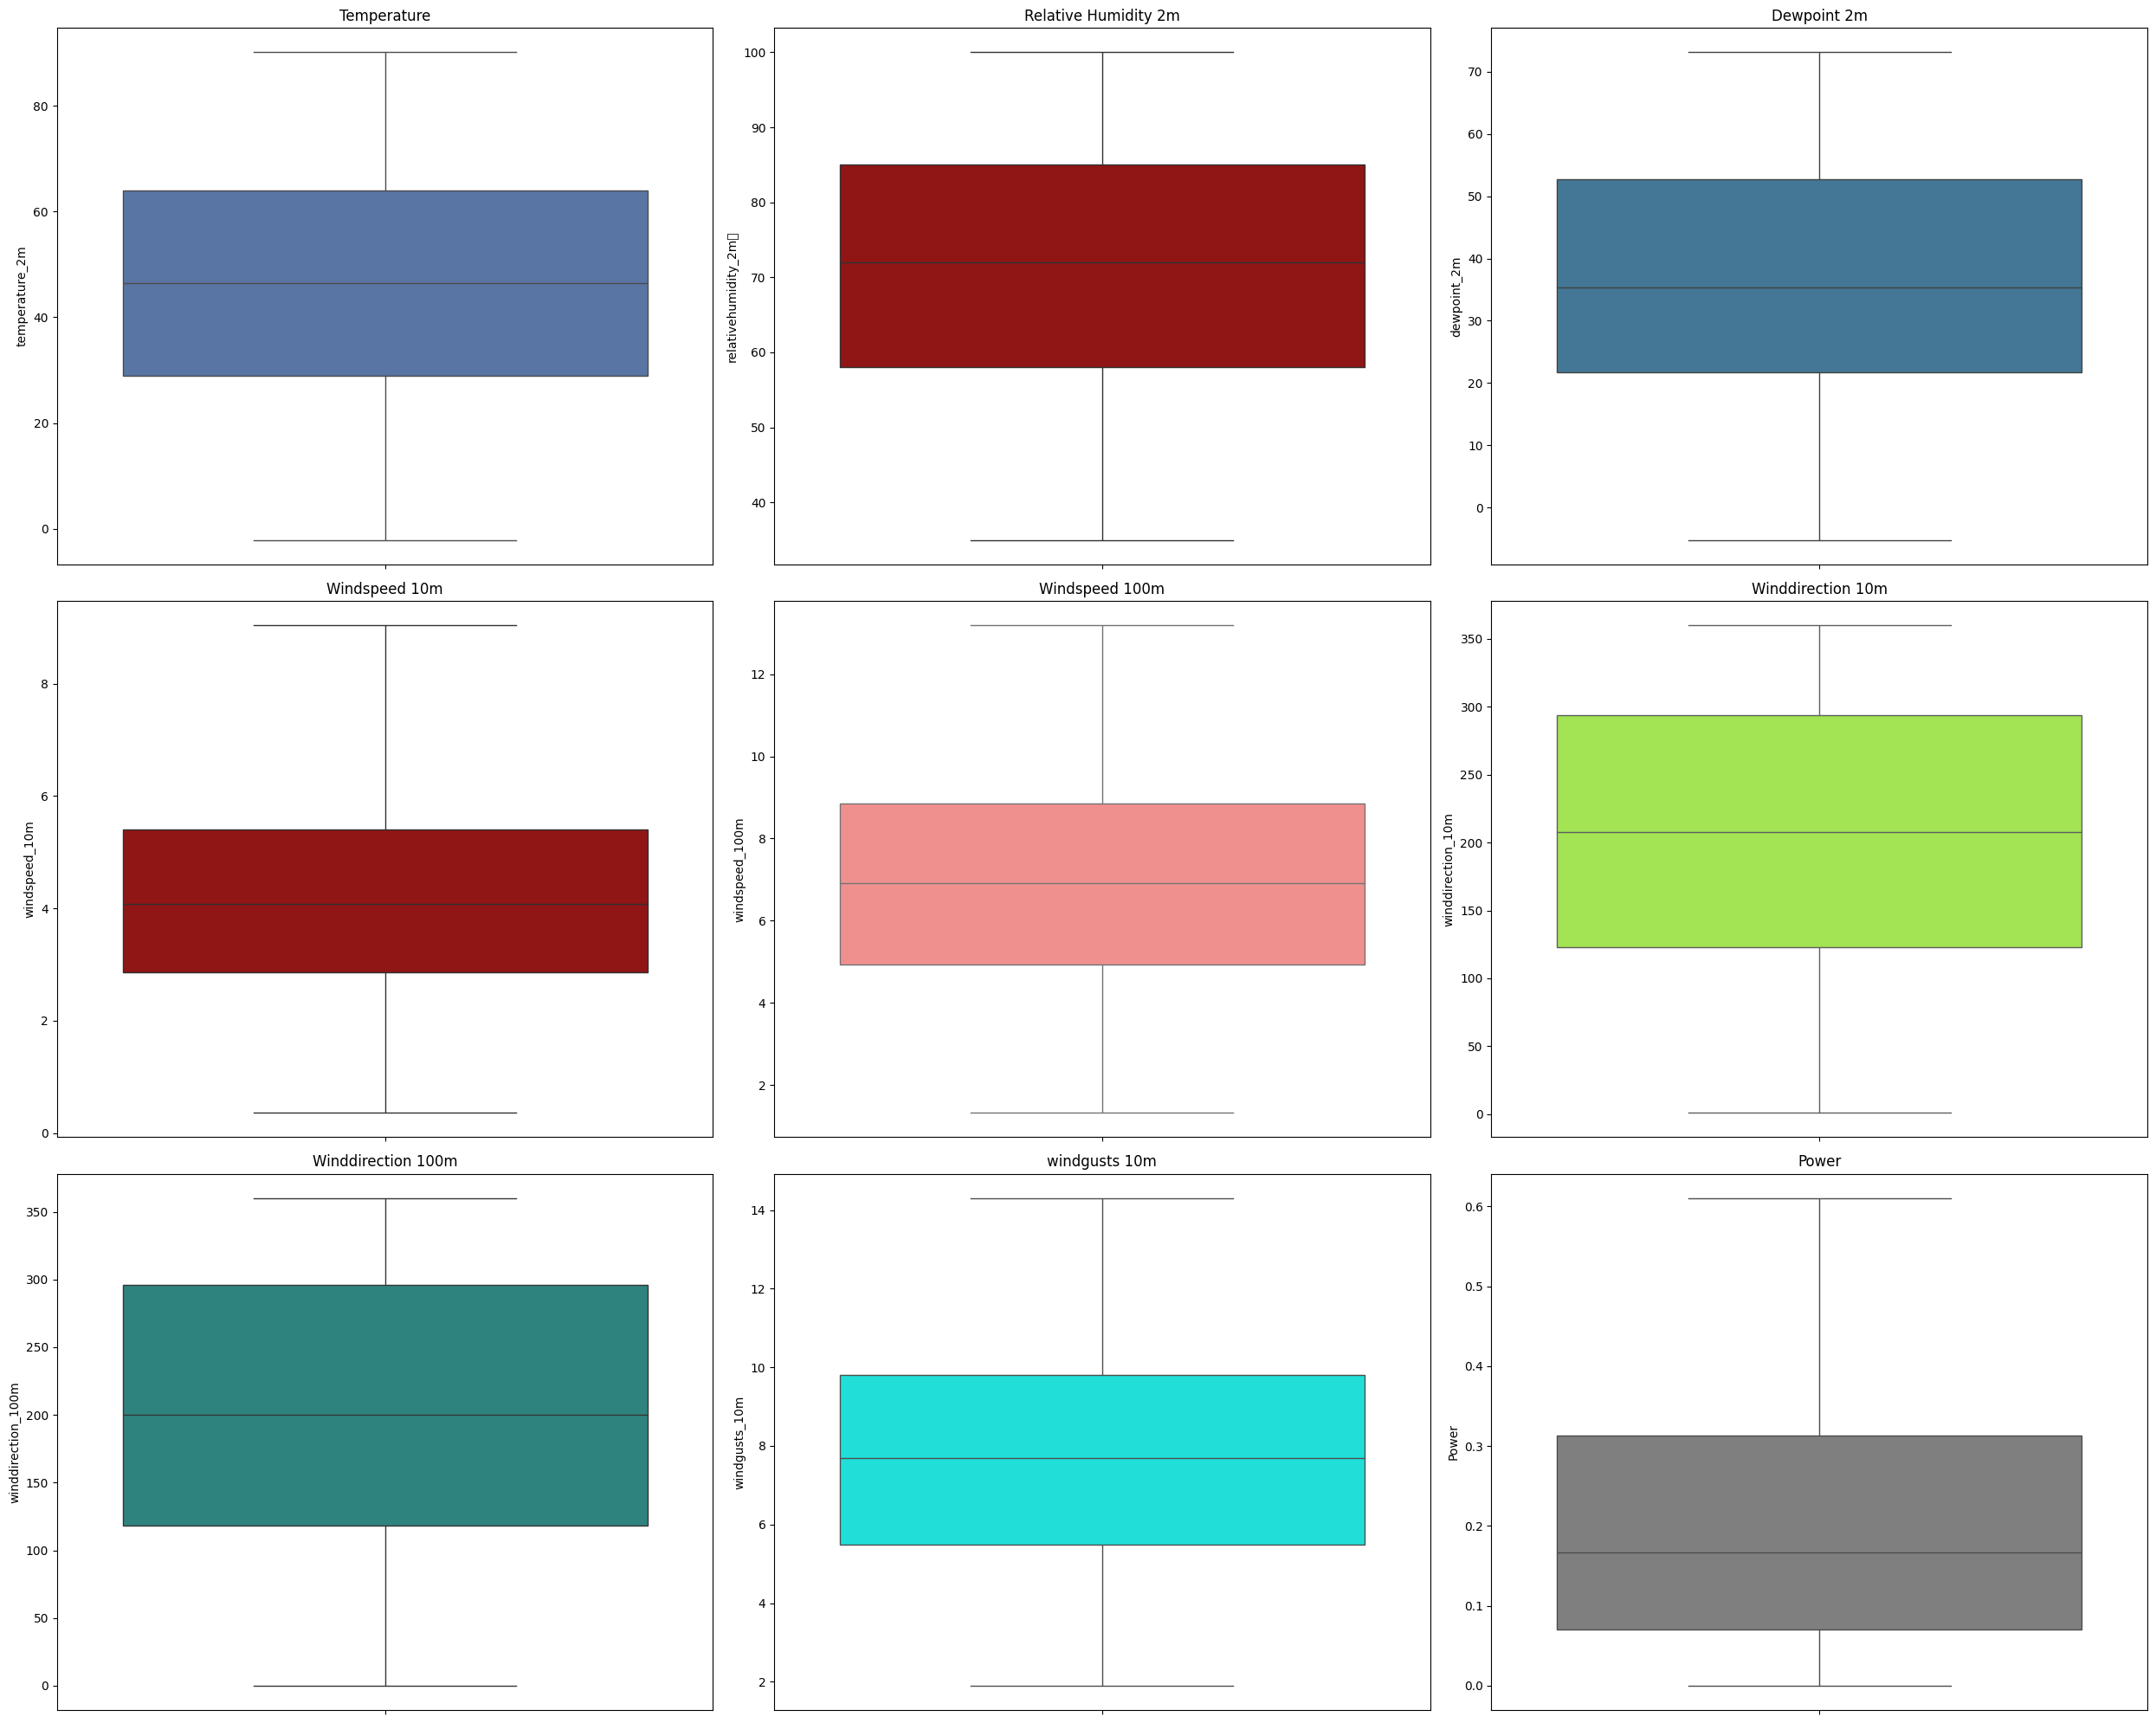

In [40]:
fig, axes = plt.subplots(3,3, figsize=(25,20))
sns.set_palette(palette="tab10")
sns.boxplot(data=df2, y= "temperature_2m",palette = 'deep',ax=axes[0,0]).set(xlabel='',ylabel='temperature_2m', title='Temperature')
sns.boxplot(data=df2, y= "relativehumidity_2m",palette = 'flag',ax=axes[0,1]).set(xlabel='',ylabel='relativehumidity_2m	', title='Relative Humidity 2m')
sns.boxplot(data=df2, y= "dewpoint_2m",palette = 'mako',ax=axes[0,2]).set(xlabel='',ylabel='dewpoint_2m', title='Dewpoint 2m')
sns.boxplot(data=df2, y= "windspeed_10m",palette = 'flag',ax=axes[1,0]).set(xlabel='',ylabel='windspeed_10m', title='Windspeed 10m')
sns.boxplot(data=df2, y= "windspeed_100m",palette = 'spring',ax=axes[1,1]).set(xlabel='',ylabel='windspeed_100m', title='Windspeed 100m')
sns.boxplot(data=df2, y= "winddirection_10m",palette = 'turbo',ax=axes[1,2]).set(xlabel='',ylabel='winddirection_10m', title='Winddirection 10m')
sns.boxplot(data=df2, y= "winddirection_100m",palette = 'viridis',ax=axes[2,0]).set(xlabel='',ylabel='winddirection_100m', title='Winddirection 100m')
sns.boxplot(data=df2, y= "windgusts_10m",palette = 'hsv',ax=axes[2,1]).set(xlabel='',ylabel='windgusts_10m', title='windgusts 10m')
sns.boxplot(data=df2, y= "Power",palette = 'binary',ax=axes[2,2]).set(xlabel='',ylabel='Power', title='Power')
plt.tight_layout()
plt.show()

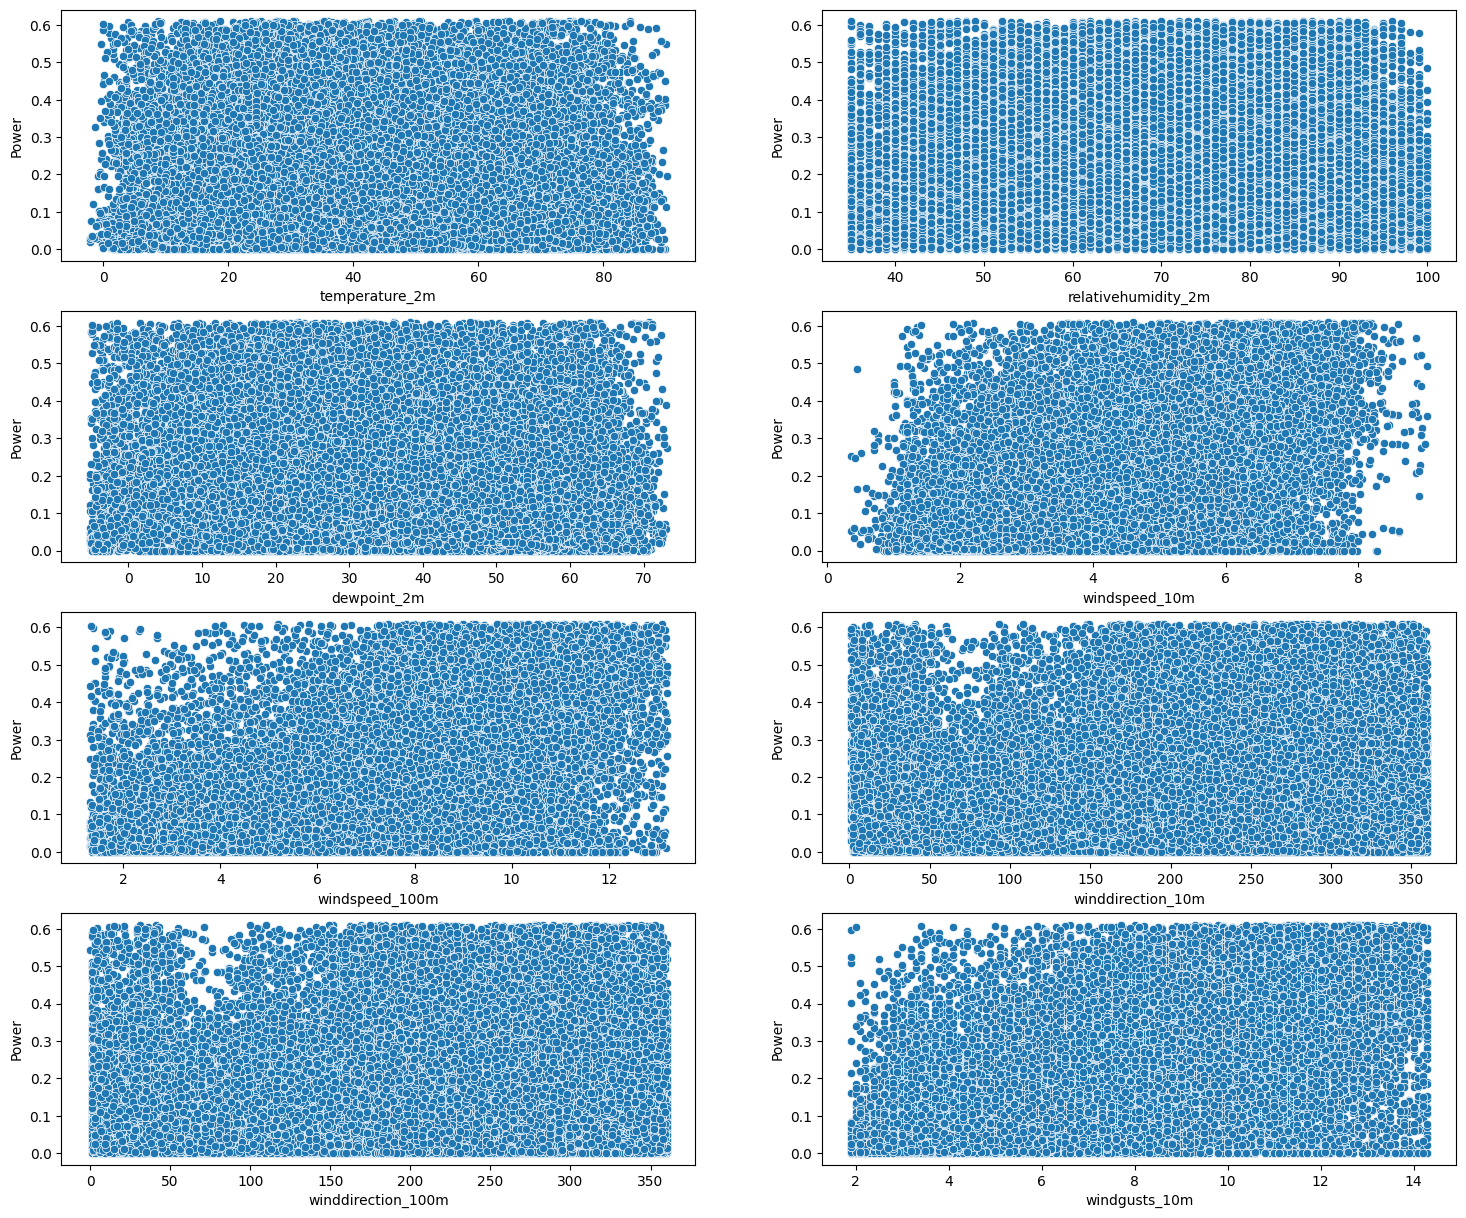

In [41]:
fig, axes = plt.subplots(4,2, figsize=(18,15))
sns.scatterplot(data=df2, y= "Power",x="temperature_2m",palette = 'viridis',ax=axes[0,0]).set(xlabel='temperature_2m',ylabel='Power')
sns.scatterplot(data=df2, y= "Power", x= "relativehumidity_2m",palette = 'deep',ax=axes[0,1]).set(xlabel='relativehumidity_2m',ylabel='Power')
sns.scatterplot(data=df2, y= "Power",x= "dewpoint_2m",palette = 'viridis',ax=axes[1,0]).set(xlabel='dewpoint_2m',ylabel='Power')
sns.scatterplot(data=df2, y= "Power", x= "windspeed_10m",palette = 'deep',ax=axes[1,1]).set(xlabel='windspeed_10m',ylabel='Power')
sns.scatterplot(data=df2, y= "Power", x= "windspeed_100m",palette = 'viridis',ax=axes[2,0]).set(xlabel='windspeed_100m',ylabel='Power')
sns.scatterplot(data=df2, y= "Power", x= "winddirection_10m",palette = 'deep',ax=axes[2,1]).set(xlabel='winddirection_10m',ylabel='Power')
sns.scatterplot(data=df2, y= "Power", x= "winddirection_100m",palette = 'viridis',ax=axes[3,0]).set(xlabel='winddirection_100m',ylabel='Power')
sns.scatterplot(data=df2, y= "Power", x= "windgusts_10m",palette = 'deep',ax=axes[3,1]).set(xlabel='windgusts_10m',ylabel='Power')
plt.show()

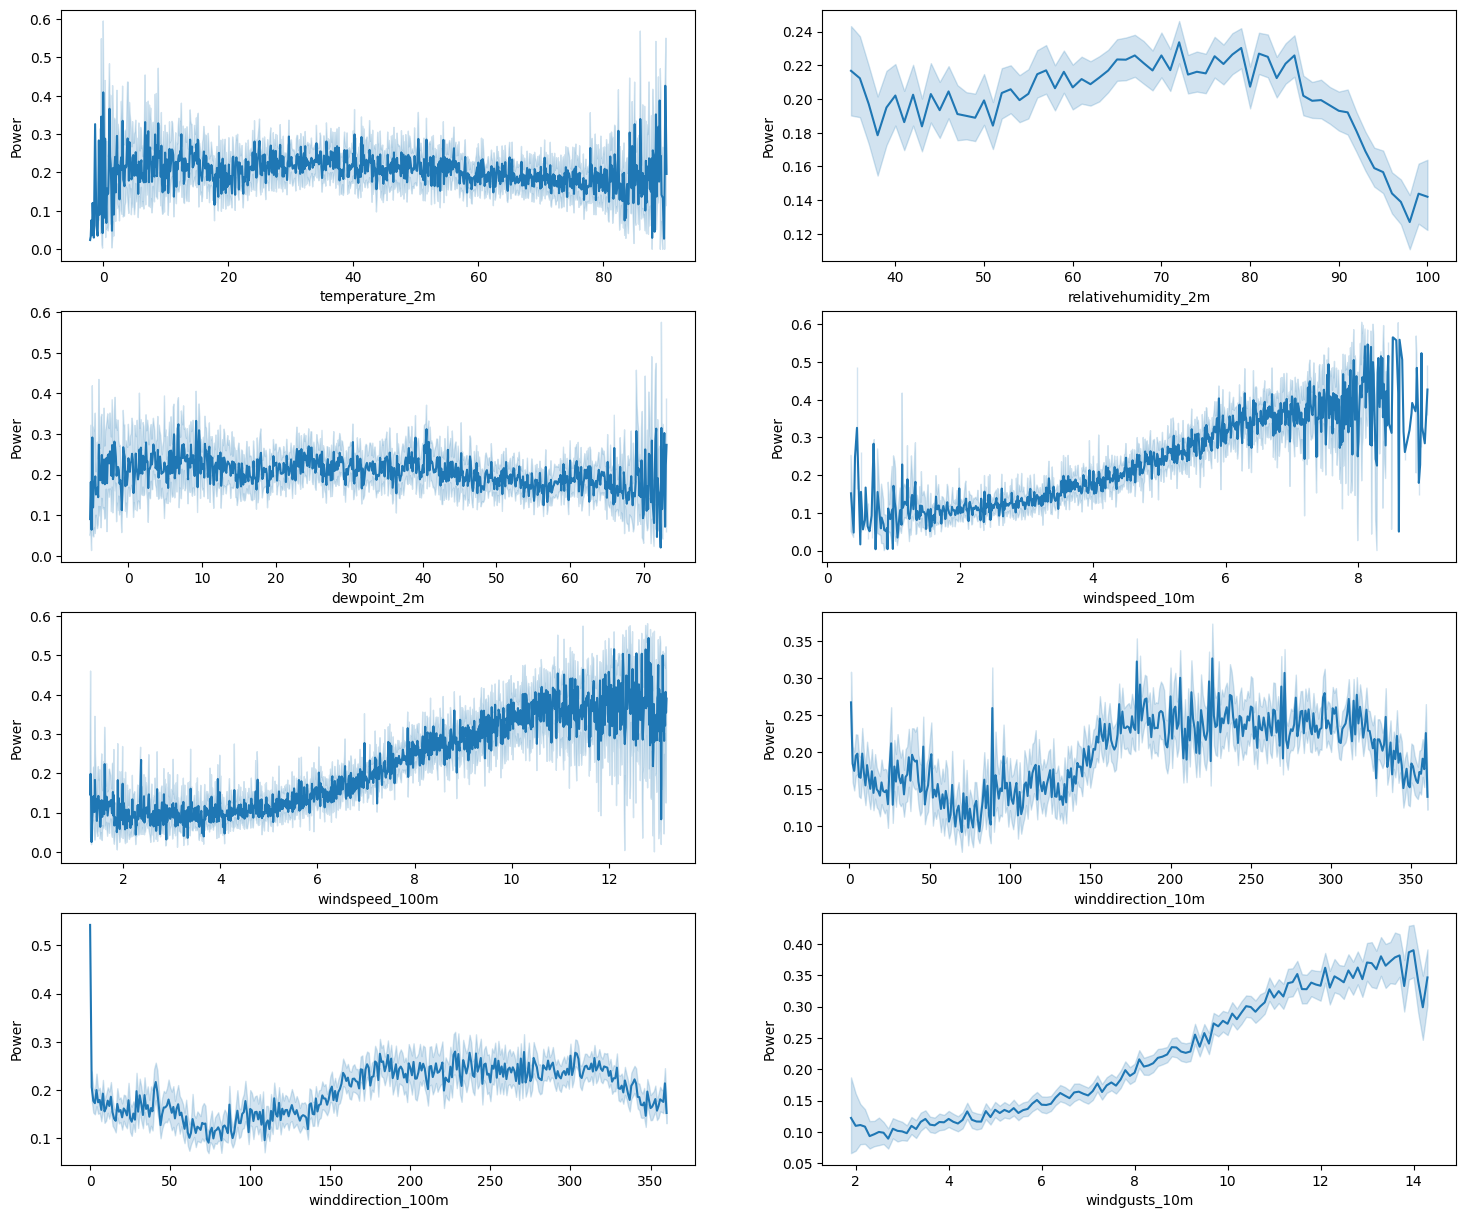

In [42]:
fig, axes = plt.subplots(4,2, figsize=(18,15))
sns.lineplot(data=df2, y= "Power",x="temperature_2m",palette = 'viridis',ax=axes[0,0]).set(xlabel='temperature_2m',ylabel='Power')
sns.lineplot(data=df2, y= "Power", x= "relativehumidity_2m",palette = 'deep',ax=axes[0,1]).set(xlabel='relativehumidity_2m',ylabel='Power')
sns.lineplot(data=df2, y= "Power",x= "dewpoint_2m",palette = 'viridis',ax=axes[1,0]).set(xlabel='dewpoint_2m',ylabel='Power')
sns.lineplot(data=df2, y= "Power", x= "windspeed_10m",palette = 'deep',ax=axes[1,1]).set(xlabel='windspeed_10m',ylabel='Power')
sns.lineplot(data=df2, y= "Power", x= "windspeed_100m",palette = 'viridis',ax=axes[2,0]).set(xlabel='windspeed_100m',ylabel='Power')
sns.lineplot(data=df2, y= "Power", x= "winddirection_10m",palette = 'deep',ax=axes[2,1]).set(xlabel='winddirection_10m',ylabel='Power')
sns.lineplot(data=df2, y= "Power", x= "winddirection_100m",palette = 'viridis',ax=axes[3,0]).set(xlabel='winddirection_100m',ylabel='Power')
sns.lineplot(data=df2, y= "Power", x= "windgusts_10m",palette = 'deep',ax=axes[3,1]).set(xlabel='windgusts_10m',ylabel='Power')
plt.show()

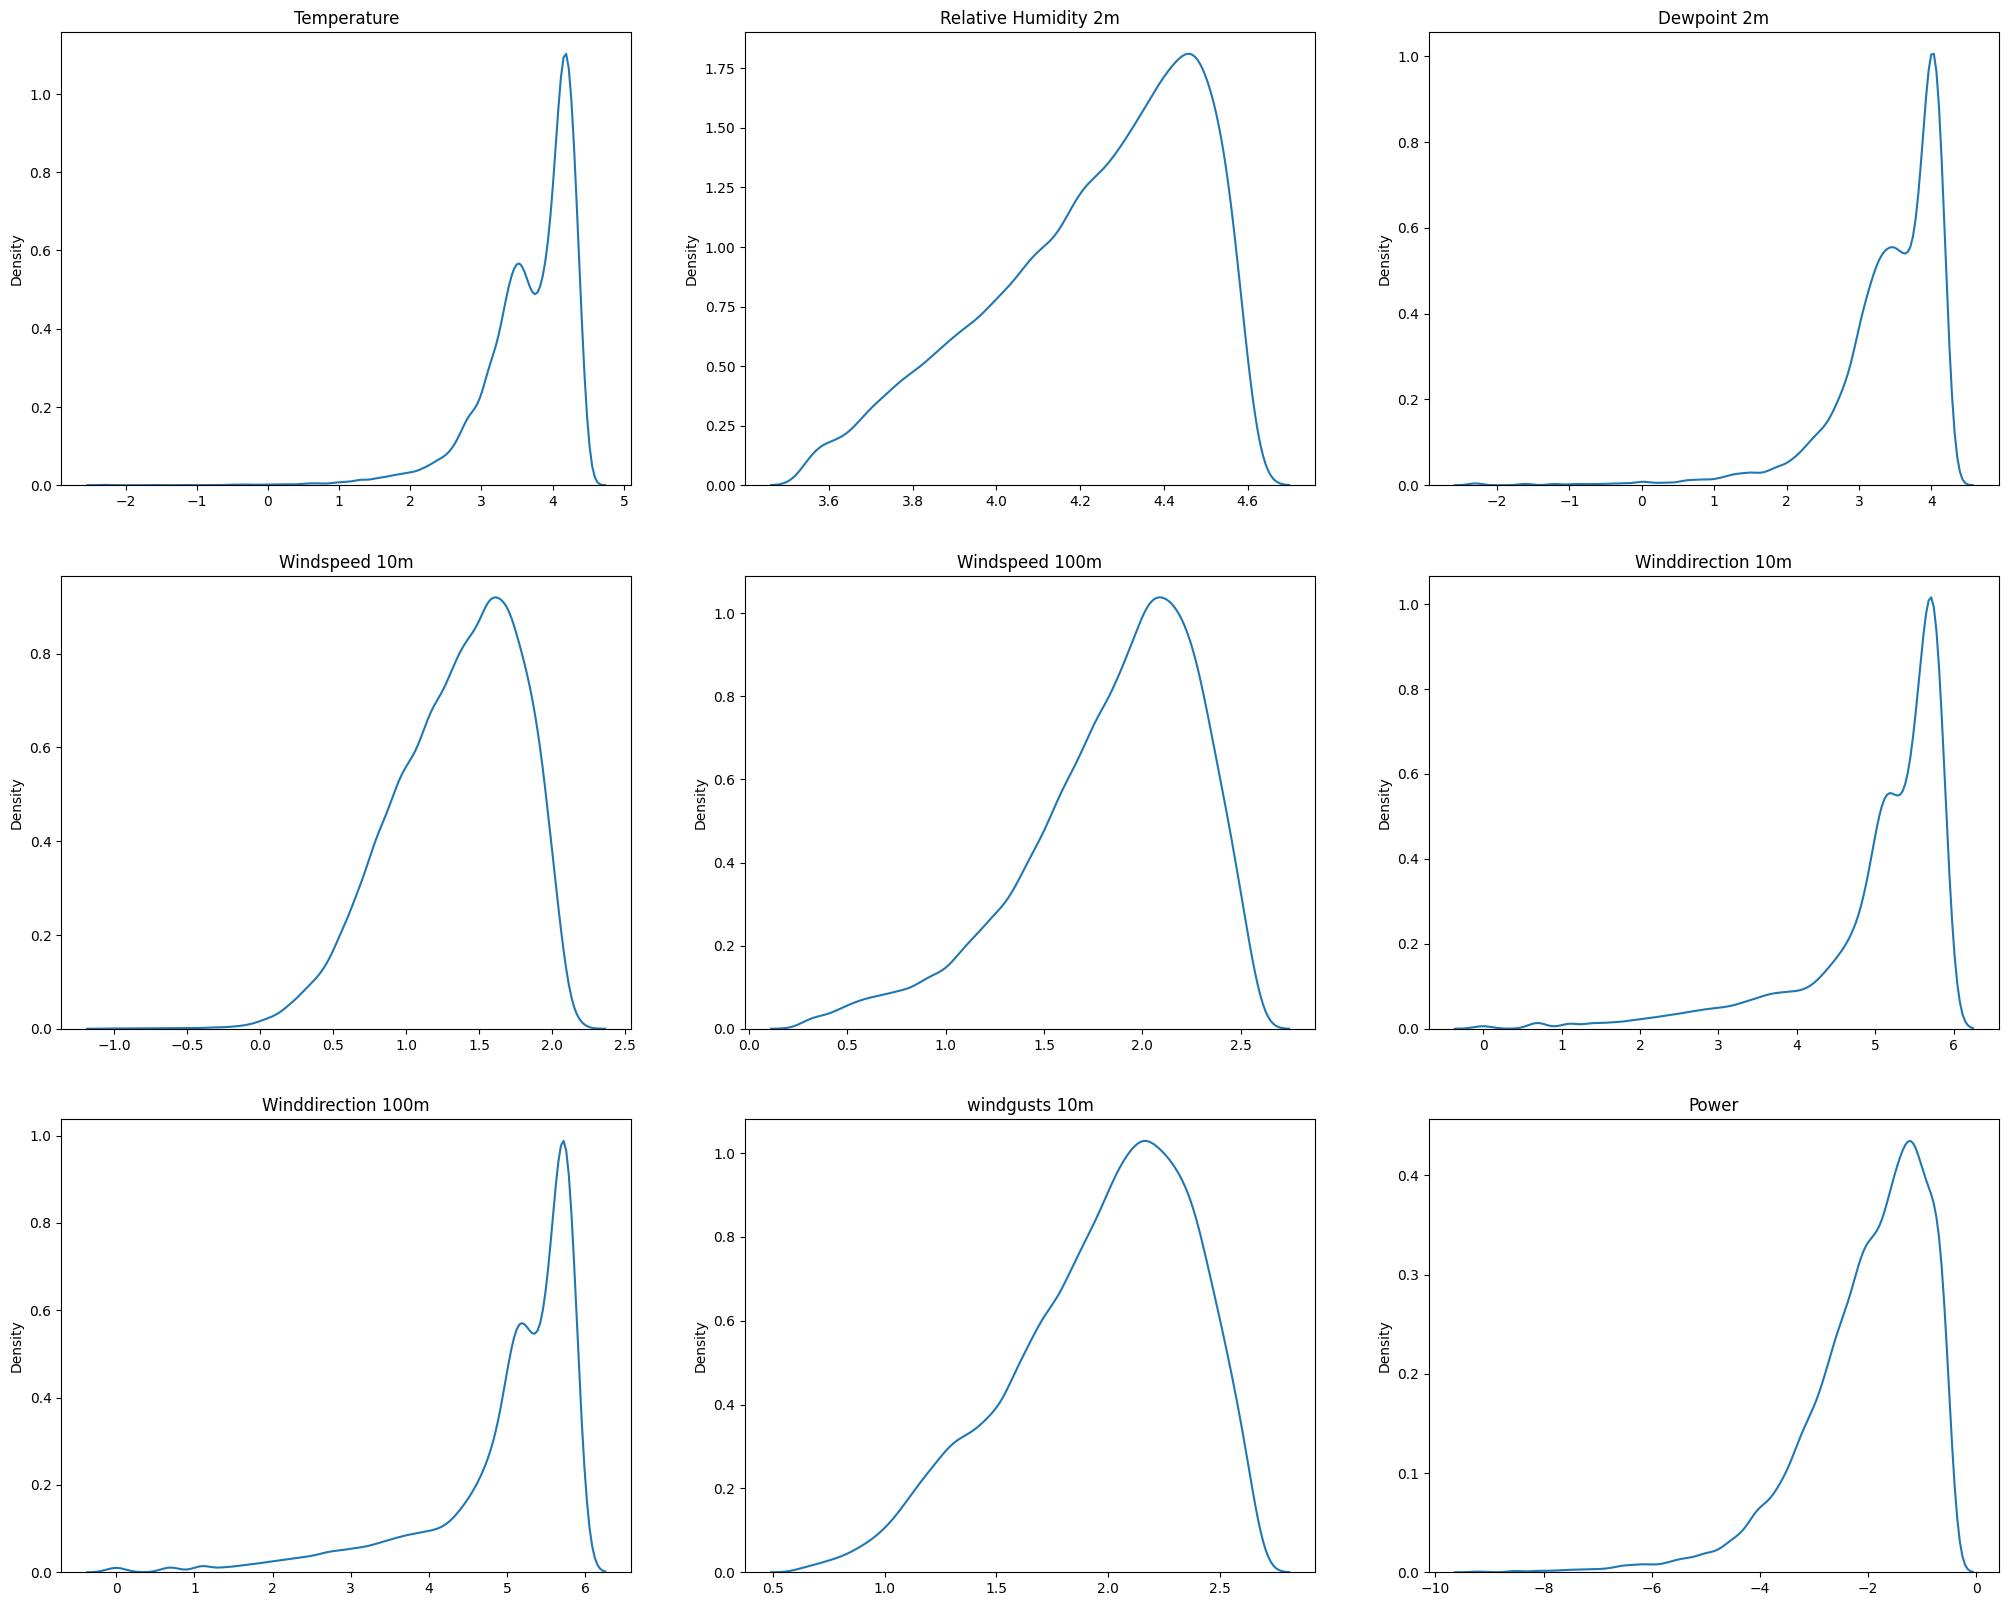

In [43]:
fig, axes = plt.subplots(3,3, figsize=(25,20))
sns.kdeplot(np.log(df2['temperature_2m']),ax=axes[0,0]).set(xlabel='', title='Temperature')
sns.kdeplot(np.log(df2['relativehumidity_2m']),ax=axes[0,1]).set(xlabel='', title='Relative Humidity 2m')
sns.kdeplot(np.log(df2['dewpoint_2m']),ax=axes[0,2]).set(xlabel='', title='Dewpoint 2m')
sns.kdeplot(np.log(df2['windspeed_10m']),ax=axes[1,0]).set(xlabel='', title='Windspeed 10m')
sns.kdeplot(np.log(df2['windspeed_100m']),ax=axes[1,1]).set(xlabel='', title='Windspeed 100m')
sns.kdeplot(np.log(df2['winddirection_10m']),ax=axes[1,2]).set(xlabel='', title='Winddirection 10m')
sns.kdeplot(np.log(df2['winddirection_100m']),ax=axes[2,0]).set(xlabel='', title='Winddirection 100m')
sns.kdeplot(np.log(df2['windgusts_10m']),ax=axes[2,1]).set(xlabel='', title='windgusts 10m')
sns.kdeplot(np.log(df2['Power']),ax=axes[2,2]).set(xlabel='', title='Power')
plt.show()

In [44]:
print("Hypothesis Testing")
print("---"*50)
print("H0 : There is no change in power generation due to the location")
print("H1 : There is change in power generation due to the location")

Hypothesis Testing
------------------------------------------------------------------------------------------------------------------------------------------------------
H0 : There is no change in power generation due to the location
H1 : There is change in power generation due to the location


In [45]:
group1 = df1['Power']  
group2 = df2['Power']  

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(group1, group2)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 90.11226155717034
P-Value: 0.0


In [46]:
f_statistic, p_value = stats.f_oneway(group1, group2)

# Print the results
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

F-Statistic: 8120.219682947879
P-Value: 0.0


In [47]:
import scipy.stats as stats

observed_values = pd.crosstab(df1['Power'], df2['Power']).values

# Perform chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(observed_values)

# Print the results
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)

Chi-Square Statistic: 47657149.62895133
P-Value: 0.0


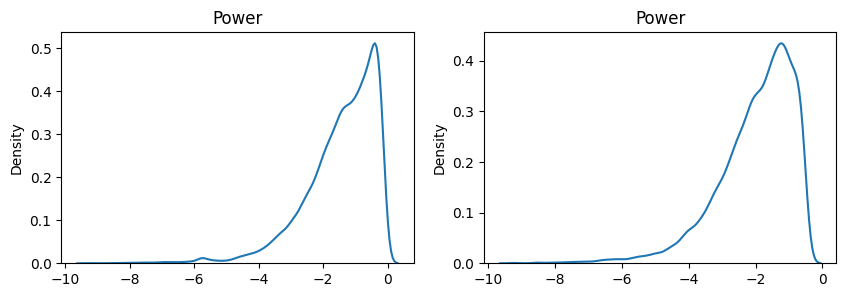

In [48]:
fig, axes = plt.subplots(1,2, figsize=(10,3))

sns.kdeplot(np.log(df1['Power']), ax=axes[0]).set(xlabel='', title='Power')
sns.kdeplot(np.log(df2['Power']), ax=axes[1]).set(xlabel='', title='Power')

plt.show()

In [49]:
print("Given the p-values obtained from the T-Test, ANOVA, and Chi-Square Test.\nIt is concluded that the null hypothesis (H0) is accepted, and the alternative hypothesis (H1) is rejected.")

Given the p-values obtained from the T-Test, ANOVA, and Chi-Square Test.
It is concluded that the null hypothesis (H0) is accepted, and the alternative hypothesis (H1) is rejected.


In [50]:
print(df1.shape)
date_train=pd.to_datetime(df1['Time'])
date_train

(35125, 14)


1       2017-01-02 01:00:00
2       2017-01-02 02:00:00
3       2017-01-02 03:00:00
4       2017-01-02 04:00:00
5       2017-01-02 05:00:00
                ...        
43795   2021-12-31 19:00:00
43796   2021-12-31 20:00:00
43797   2021-12-31 21:00:00
43798   2021-12-31 22:00:00
43799   2021-12-31 23:00:00
Name: Time, Length: 35125, dtype: datetime64[ns]

In [51]:
df1.isnull().sum()

Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
Year                   0
Month                  0
Quarter                0
Day                    0
dtype: int64

In [52]:
duplicate=df1[df1.duplicated()]

In [53]:
duplicate

Empty DataFrame
Columns: [Time, temperature_2m, relativehumidity_2m, dewpoint_2m, windspeed_10m, windspeed_100m, winddirection_10m, winddirection_100m, windgusts_10m, Power, Year, Month, Quarter, Day]
Index: []

In [54]:
print("There is no duplicate values")

There is no duplicate values


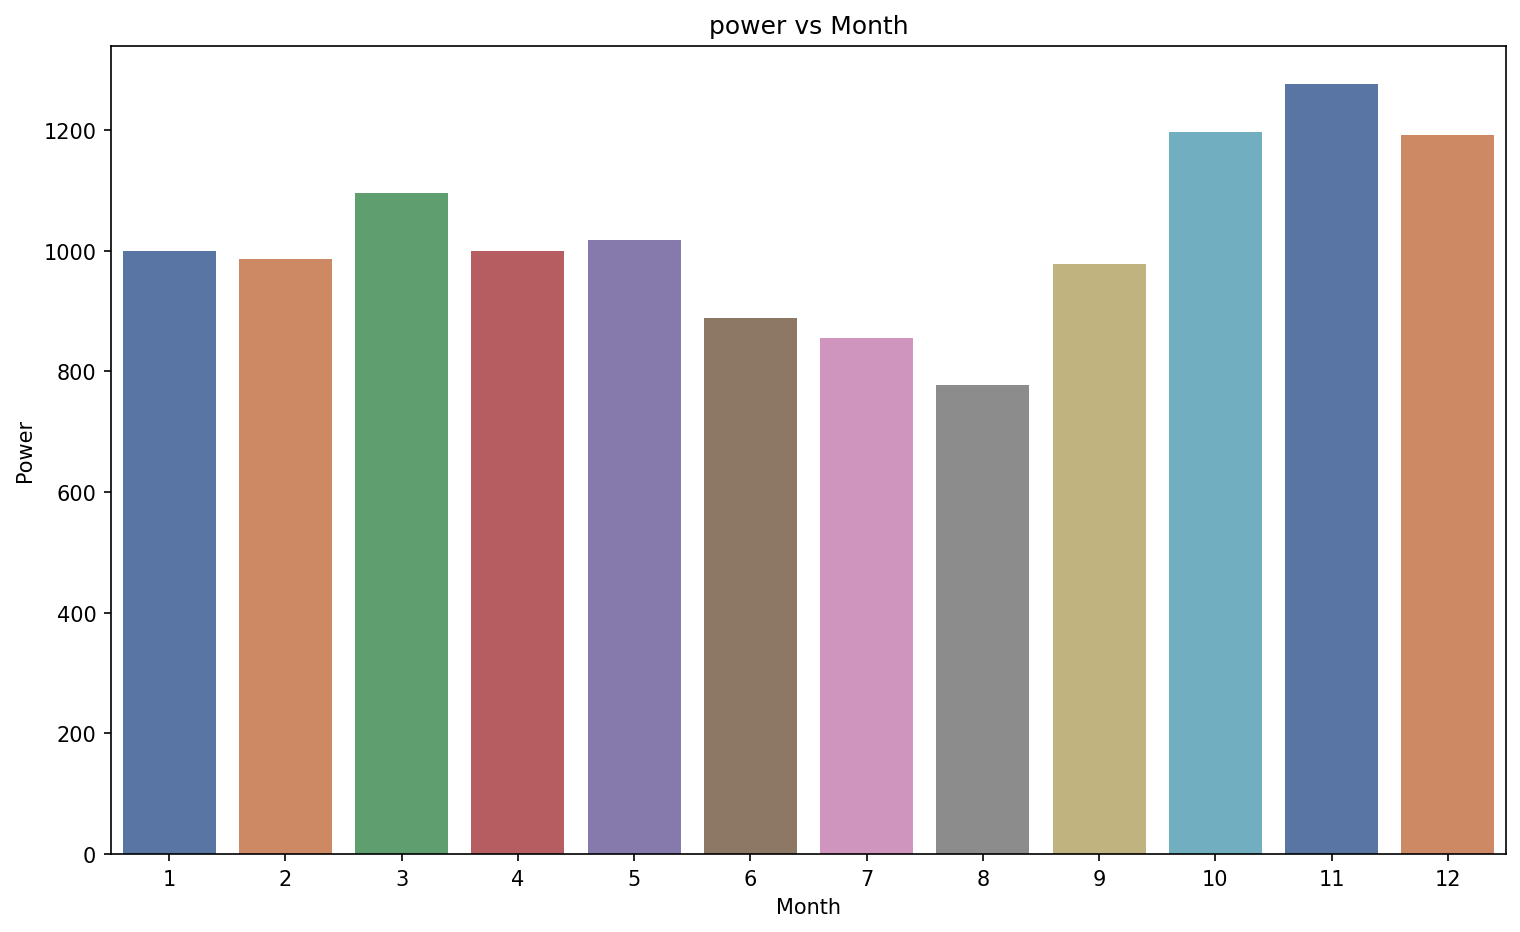

In [55]:
day_per_temperature = df1.groupby("Month")["Power"].sum().sort_values(ascending=False)

plt.figure(figsize = (12, 7), dpi = 150)
sns.barplot(x = day_per_temperature.index, y = day_per_temperature.values,palette='deep')
plt.xlabel("Month")
#plt.xticks(['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.ylabel("Power")
plt.title("power vs Month");

In [56]:
train_size = int(0.85 * len(df1))
test_size = len(df1) - train_size

univariate_df = df1[['Time', 'Power']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))

29856 5269


In [57]:
data = univariate_df.filter(['y'])
#Convert the dataframe to a numpy array
dataset = data.values

scaler = MinMaxScaler(feature_range=(-1, 0))
scaled_data = scaler.fit_transform(dataset)

scaled_data[:10]

array([[-0.84165462],
       [-0.86500612],
       [-0.88846881],
       [-0.9118203 ],
       [-0.91348827],
       [-0.8933615 ],
       [-0.87312354],
       [-0.85299678],
       [-0.83287001],
       [-0.81274324]])

In [58]:
look_back = 52
# Split into train and test sets
train, test = scaled_data[:train_size-look_back,:], scaled_data[train_size-look_back:,:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(look_back, len(dataset)):
        a = dataset[i-look_back:i, 0]
        X.append(a)
        Y.append(dataset[i, 0])
    return np.array(X), np.array(Y)

x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

print(len(x_train), len(x_test))

29752 5269


In [59]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5, validation_data=(x_test, y_test))

model.summary()

Epoch 1/5
29752/29752 [==============================] - 87s 3ms/step - loss: 0.0047 - val_loss: 0.0024
Epoch 2/5
29752/29752 [==============================] - 85s 3ms/step - loss: 0.0029 - val_loss: 0.0018
Epoch 3/5
29752/29752 [==============================] - 85s 3ms/step - loss: 0.0026 - val_loss: 0.0021
Epoch 4/5
29752/29752 [==============================] - 85s 3ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 5/5
29752/29752 [==============================] - 85s 3ms/step - loss: 0.0023 - val_loss: 0.0015
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            92672     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625     

In [60]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

# invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])

test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Get the root mean squared error (RMSE) and MAE
score_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
score_mae = mean_absolute_error(y_test[0], test_predict[:,0])
print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

165/165 [==============================] - 0s 2ms/step
RMSE: 0.03452868053449202


Text(0, 0.5, 'Power')

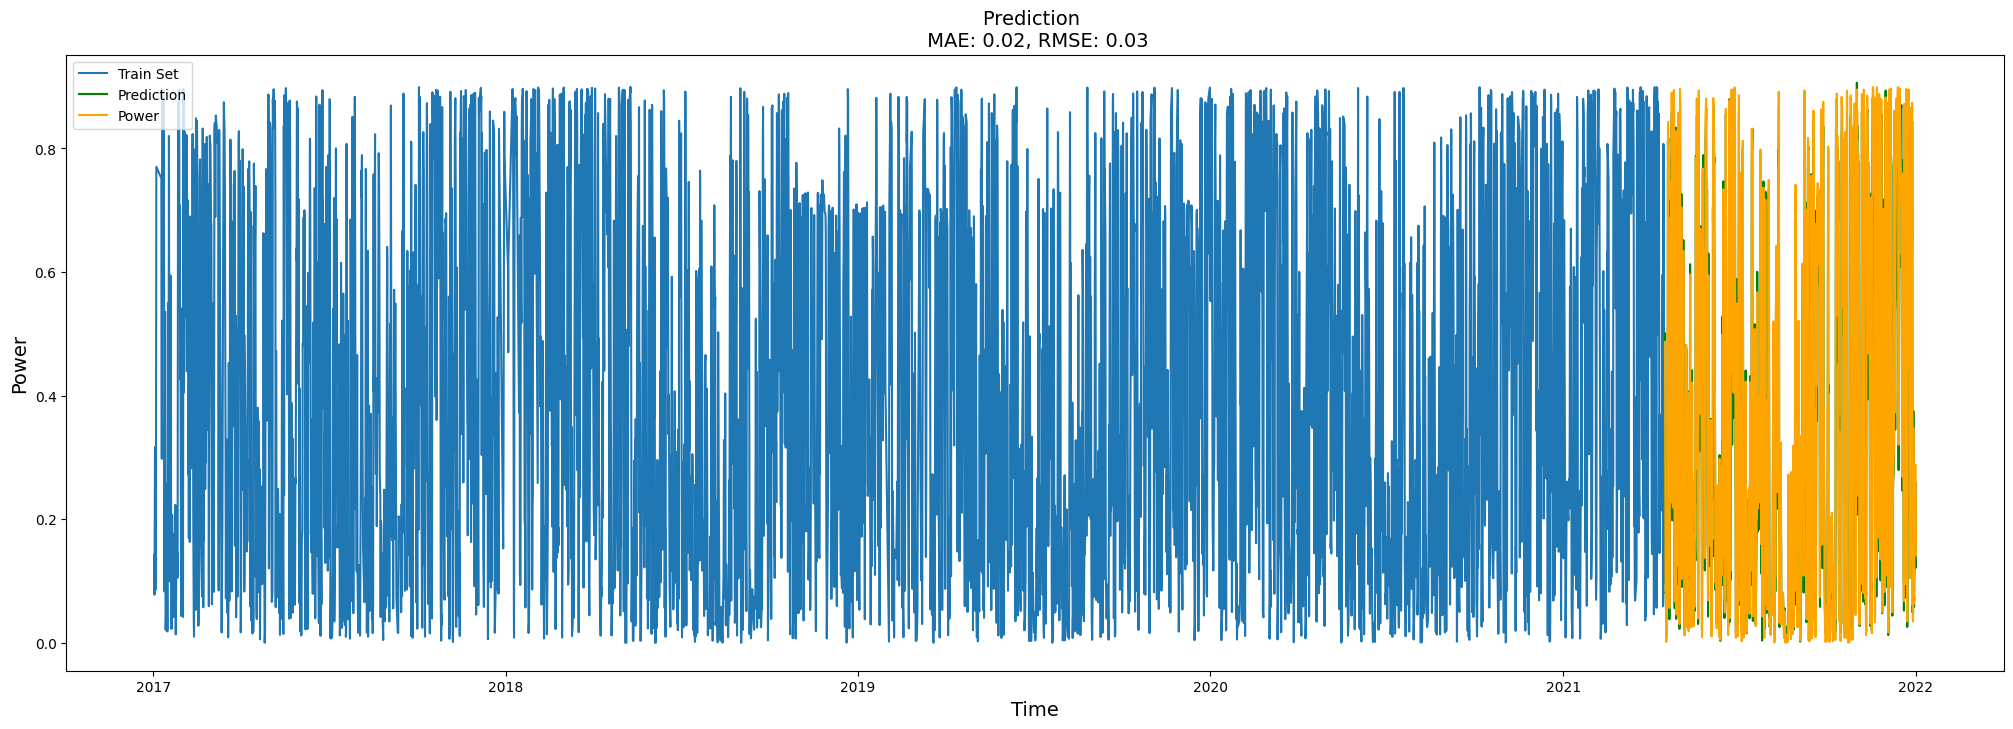

In [61]:
x_train_ticks = univariate_df.head(train_size)['ds']
y_train = univariate_df.head(train_size)['y']
x_test_ticks = univariate_df.tail(test_size)['ds']

# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(8)
f.set_figwidth(25)

sns.lineplot(x=x_train_ticks, y=y_train, ax=ax, label='Train Set') #navajowhite
sns.lineplot(x=x_test_ticks, y=test_predict[:,0], ax=ax, color='green', label='Prediction') #navajowhite
sns.lineplot(x=x_test_ticks, y=y_test[0], ax=ax, color='orange', label='Power') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Time', fontsize=14)
ax.set_ylabel(ylabel='Power', fontsize=14)
